In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [80]:
#FILE FROM GALAXY NAMED CAMI AMBER: Results
url_result = "https://usegalaxy.eu/api/datasets/4838ba20a6d86765773e1fc5f802d3c8/display?to_ext=tabular"
#FILE FROM GALAXY NAMED recover_genome.tsv
url_genome = 'https://usegalaxy.eu/api/datasets/4838ba20a6d867654178d66e416f0f90/display?to_ext=tabular'
#FILE FROM GALAXY NAMED taxonomic_values.tsv
url_tax_val = 'https://usegalaxy.eu/api/datasets/4838ba20a6d86765cd14bc2883986fec/display?to_ext=tabular'
#FILE FROM GALAXY NAMED values.tsv
url_val = 'https://usegalaxy.eu/api/datasets/4838ba20a6d86765b860086970c49431/display?to_ext=tabular'
#FILE FROM GALAXY NAMED values_average.tsv FOR Galaxy workflow RESULT
url_own_average = 'https://usegalaxy.eu/api/datasets/4838ba20a6d8676591609b9453f22511/display?to_ext=tabular'
#FILE FROM GALAXY NAMED values_average.tsv FOR CAMI EVAL RESULT
url_cami_average = 'https://usegalaxy.eu/api/datasets/4838ba20a6d86765488b04c7b91aafac/display?to_ext=tabular'
#FILE FROM GALAXY NAMED recover_genome_das_tool_high_treshold.tsv
url_high = 'https://usegalaxy.eu/api/datasets/4838ba20a6d86765c4f7d5871bb52cb7/display?to_ext=tabular'
#FILE FROM GALAXY NAMED recover_genome_das_tool_low_treshold.tsv
url_low = 'https://usegalaxy.eu/api/datasets/4838ba20a6d86765d9347651b82191fe/display?to_ext=tabular'
#FILE FROM GALAXY NAMED recover_genome_binner_adjust.tsv
url_binner = 'https://usegalaxy.eu/api/datasets/4838ba20a6d86765893d2150a3ea9b04/display?to_ext=tabular'
#FILE FORM GALAXY NAMED values_average.tsv FOR Galaxy workflow pooled RESULT
url_pooled = 'https://usegalaxy.eu/api/datasets/4838ba20a6d867654206018bbf9e983f/display?to_ext=mothur.axes'

#DATA FRAME FOR EACH URL
df_result = pd.read_csv(url_result, sep="\t")
df_genome = pd.read_csv(url_genome, sep="\t")
df_tax_val = pd.read_csv(url_tax_val, sep="\t")
df_val = pd.read_csv(url_val, sep="\t")
df_own_av = pd.read_csv(url_own_average, sep="\t")
df_cami_av = pd.read_csv(url_cami_average, sep="\t")
df_low = pd.read_csv(url_low, sep="\t")
df_high = pd.read_csv(url_high, sep="\t")
df_binner = pd.read_csv(url_binner, sep="\t")
df_pooled_av = pd.read_csv(url_pooled, sep="\t")

dfs = [df_result, df_genome, df_tax_val, df_val, df_own_av, df_low, df_high, df_binner, df_pooled_av]

metabat_ver = '(2.15)'
semibin_ver = '(2.0.2)'
concoct_ver = '(1.1.0)'
das_tool_ver = '(1.1.6)'

for f in dfs:
    f.loc[f['Tool'].str.startswith('MetaBat2'), 'Tool'] = 'MetaBat2 ' + metabat_ver
    f.loc[f['Tool'].str.startswith('SemiBin'), 'Tool'] = 'SemiBin ' + semibin_ver
    f.loc[f['Tool'].str.startswith('CONCOCT'), 'Tool'] = 'CONCOCT ' + concoct_ver
    f.loc[f['Tool'].str.startswith('DAS Tool'), 'Tool'] = 'DAS Tool ' + das_tool_ver
    

print(df_result.columns)
print(df_result.shape)

html_result = df_result.to_html(index=False)
scrollable_html = f'''
<div style="height: 400px; overflow: auto;">
    {html_result}
</div>
'''
display(HTML(scrollable_html))

print(df_genome.columns)
print(df_genome.shape)
html_genome = df_genome.to_html(index=False)
scrollable_html = f'''
<div style="height: 400px; overflow: auto;">
    {html_genome}
</div>
'''
display(HTML(scrollable_html))

print(df_tax_val.columns)
print(df_tax_val.shape)
html_tax_val = df_tax_val.to_html(index=False)
scrollable_html = f'''
<div style="height: 400px; overflow: auto;">
    {html_tax_val}
</div>
'''
display(HTML(scrollable_html))

print(df_val.columns)
print(df_val.shape)
html_val = df_val.to_html(index=False)
scrollable_html = f'''
<div style="height: 400px; overflow: auto;">
    {html_val}
</div>
'''
display(HTML(scrollable_html))

print(df_own_av.columns)
print(df_own_av.shape)
html_own = df_own_av.to_html(index=False)
scrollable_html = f'''
<div style="height: 400px; overflow: auto;">
    {html_own}
</div>
'''
display(HTML(scrollable_html))

print(df_cami_av.columns)
print(df_cami_av.shape)
html_cami = df_cami_av.to_html(index=False)
scrollable_html = f'''
<div style="height: 400px; overflow: auto;">
    {html_cami}
</div>
'''
display(HTML(scrollable_html))

print(df_low.columns)
print(df_low.shape)
html_low = df_low.to_html(index=False)
scrollable_html = f'''
<div style="height: 400px; overflow: auto;">
    {html_low}
</div>
'''
display(HTML(scrollable_html))

print(df_high.columns)
print(df_high.shape)
html_high = df_high.to_html(index=False)
scrollable_html = f'''
<div style="height: 400px; overflow: auto;">
    {html_high}
</div>
'''
display(HTML(scrollable_html))

print(df_binner.columns)
print(df_binner.shape)
html_binner = df_binner.to_html(index=False)
scrollable_html = f'''
<div style="height: 400px; overflow: auto;">
    {html_binner}
</div>
'''
display(HTML(scrollable_html))

print(df_pooled_av.columns)
print(df_pooled_av.shape)
html_pooled = df_pooled_av.to_html(index=False)
scrollable_html = f'''
<div style="height: 400px; overflow: auto;">
    {html_pooled}
</div>
'''
display(HTML(scrollable_html))

sns.set(style='darkgrid')



Index(['Sample', 'Tool', 'accuracy_bp', 'accuracy_seq',
       'adjusted_rand_index_bp', 'adjusted_rand_index_seq', 'binning type',
       'f1_score_bp', 'f1_score_bp_cami1', 'f1_score_per_bp',
       'f1_score_per_seq', 'f1_score_seq', 'f1_score_seq_cami1',
       'misclassification_bp', 'misclassification_seq',
       'percentage_of_assigned_bps', 'percentage_of_assigned_seqs',
       'precision_avg_bp', 'precision_avg_bp_sem', 'precision_avg_bp_var',
       'precision_avg_seq', 'precision_avg_seq_sem', 'precision_weighted_bp',
       'precision_weighted_seq', 'rand_index_bp', 'rand_index_seq', 'rank',
       'recall_avg_bp', 'recall_avg_bp_cami1', 'recall_avg_bp_sem',
       'recall_avg_bp_sem_cami1', 'recall_avg_bp_var',
       'recall_avg_bp_var_cami1', 'recall_avg_seq', 'recall_avg_seq_cami1',
       'recall_avg_seq_sem', 'recall_avg_seq_sem_cami1', 'recall_weighted_bp',
       'recall_weighted_seq', 'unifrac_bp', 'unifrac_seq'],
      dtype='object')
(407, 41)


Sample,Tool,accuracy_bp,accuracy_seq,adjusted_rand_index_bp,adjusted_rand_index_seq,binning type,f1_score_bp,f1_score_bp_cami1,f1_score_per_bp,f1_score_per_seq,f1_score_seq,f1_score_seq_cami1,misclassification_bp,misclassification_seq,percentage_of_assigned_bps,percentage_of_assigned_seqs,precision_avg_bp,precision_avg_bp_sem,precision_avg_bp_var,precision_avg_seq,precision_avg_seq_sem,precision_weighted_bp,precision_weighted_seq,rand_index_bp,rand_index_seq,rank,recall_avg_bp,recall_avg_bp_cami1,recall_avg_bp_sem,recall_avg_bp_sem_cami1,recall_avg_bp_var,recall_avg_bp_var_cami1,recall_avg_seq,recall_avg_seq_cami1,recall_avg_seq_sem,recall_avg_seq_sem_cami1,recall_weighted_bp,recall_weighted_seq,unifrac_bp,unifrac_seq
sample_0,Gold standard,1.000000,1.000000,1.000000,1.000000,genome,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN
sample_0,MetaBat2 (2.15),0.222290,0.015277,0.319594,0.202816,genome,0.268534,0.173199,0.432974,0.057693,0.204142,0.139702,0.395171,0.579647,0.367526,0.036344,0.870606,0.025793,0.054552,0.832778,0.029305,0.604829,0.420353,0.960980,0.928914,NaN,0.158750,0.096165,0.012973,0.011147,0.099135,0.073683,0.116329,0.076246,0.010836,0.009543,0.337171,0.030972,NaN,NaN
sample_0,CONCOCT (1.1.0),0.275896,0.034938,0.454497,0.195196,genome,0.551598,0.272358,0.465960,0.098909,0.471053,0.224432,0.417811,0.584912,0.473894,0.084171,0.682971,0.020629,0.093626,0.622311,0.022817,0.582189,0.415088,0.985717,0.968620,NaN,0.462613,0.170094,0.017319,0.013481,0.176666,0.115229,0.378946,0.136902,0.016685,0.011877,0.388417,0.056143,NaN,NaN
sample_0,SemiBin (2.0.2),0.270691,0.013831,0.876319,0.812169,genome,0.219155,0.196625,0.422795,0.028712,0.165702,0.153678,0.102661,0.191589,0.301660,0.017109,0.814365,0.023023,0.064135,0.770752,0.025008,0.897339,0.808411,0.996719,0.993697,NaN,0.126614,0.111810,0.012074,0.011494,0.085870,0.080450,0.092830,0.085348,0.010163,0.009712,0.276547,0.014615,NaN,NaN
sample_0,DAS Tool (1.1.6),0.219592,0.010498,0.939113,0.915641,genome,0.193237,0.171586,0.368904,0.023081,0.156518,0.139923,0.055271,0.119752,0.232439,0.011926,0.950322,0.013258,0.011074,0.855770,0.029294,0.944729,0.880248,0.997771,0.994216,NaN,0.107553,0.094307,0.011889,0.011402,0.083250,0.076577,0.086136,0.076190,0.010221,0.009713,0.229202,0.011694,NaN,NaN
sample_1,Gold standard,1.000000,1.000000,1.000000,1.000000,genome,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN
sample_1,MetaBat2 (2.15),0.220798,0.014461,0.364031,0.160098,genome,0.273487,0.189420,0.424421,0.057338,0.209232,0.153459,0.366827,0.598361,0.348717,0.036005,0.859374,0.024707,0.057990,0.817735,0.029353,0.633173,0.401639,0.972326,0.928524,NaN,0.162620,0.106441,0.012623,0.011315,0.098788,0.079885,0.119963,0.084675,0.010732,0.009723,0.319188,0.030873,NaN,NaN
sample_1,CONCOCT (1.1.0),0.241509,0.031398,0.407126,0.149128,genome,0.508442,0.256149,0.441603,0.101432,0.425338,0.211312,0.472328,0.636031,0.457689,0.086267,0.691217,0.020566,0.096854,0.631403,0.023548,0.527672,0.363969,0.984978,0.963973,NaN,0.402113,0.157203,0.016452,0.012764,0.167824,0.109490,0.320681,0.126889,0.015716,0.011273,0.379674,0.058927,NaN,NaN
sample_1,SemiBin (2.0.2),0.254987,0.013545,0.873103,0.768733,genome,0.221840,0.208074,0.401603,0.027256,0.167704,0.160133,0.103570,0.173392,0.284448,0.016386,0.834496,0.019425,0.053583,0.802301,0.021748,0.896430,0.826608,0.997039,0.994164,NaN,0.127923,0.118855,0.011825,0.011324,0.086691,0.082329,0.093638,0.088943,0.009867,0.009467,0.258765,0.013857,NaN,NaN
sample_1,DAS Tool (1.1.6),0.207127,0.010923,

Index(['Sample', 'Tool', 'Contamination', '> 50% completeness',
       '> 70% completeness', '> 90% completeness'],
      dtype='object')
(100, 6)


Sample,Tool,Contamination,> 50% completeness,> 70% completeness,> 90% completeness
sample_0,CONCOCT (1.1.0),< 10%,51,42,31
sample_0,CONCOCT (1.1.0),< 5%,46,39,29
sample_0,DAS Tool (1.1.6),< 10%,54,50,38
sample_0,DAS Tool (1.1.6),< 5%,51,47,36
sample_0,Gold standard,< 10%,589,589,589
sample_0,Gold standard,< 5%,589,589,589
sample_0,MetaBat2 (2.15),< 10%,45,41,30
sample_0,MetaBat2 (2.15),< 5%,43,39,30
sample_0,SemiBin (2.0.2),< 10%,58,50,37
sample_0,SemiBin (2.0.2),< 5%,57,49,37


Index(['Sample', 'Tool', 'purity_bp', 'completeness_bp',
       'percentage_binned_pb', 'unifrac_bp', 'rank'],
      dtype='object')
(100, 7)


Sample,Tool,purity_bp,completeness_bp,percentage_binned_pb,unifrac_bp,rank
sample_0,Gold standard,1.000,1.000,1.000,0.000,phylum
sample_0,MetaBat2 (2.15),0.981,0.174,0.177,5.569,phylum
sample_0,CONCOCT (1.1.0),0.967,0.221,0.228,4.888,phylum
sample_0,SemiBin (2.0.2),0.992,0.258,0.260,3.604,phylum
sample_0,DAS Tool (1.1.6),0.998,0.207,0.208,4.728,phylum
sample_1,Gold standard,1.000,1.000,1.000,0.000,phylum
sample_1,MetaBat2 (2.15),0.947,0.183,0.193,5.682,phylum
sample_1,CONCOCT (1.1.0),0.930,0.191,0.205,5.168,phylum
sample_1,SemiBin (2.0.2),0.971,0.234,0.241,4.161,phylum
sample_1,DAS Tool (1.1.6),0.977,0.198,0.203,5.313,phylum


Index(['Sample', 'Tool', 'purity_bp', 'completeness_bp',
       'percentage_binned_pb'],
      dtype='object')
(50, 5)


Sample,Tool,purity_bp,completeness_bp,percentage_binned_pb
sample_0,Gold standard,1.000,1.000,1.000
sample_0,MetaBat2 (2.15),0.605,0.337,0.368
sample_0,CONCOCT (1.1.0),0.582,0.388,0.474
sample_0,SemiBin (2.0.2),0.897,0.277,0.302
sample_0,DAS Tool (1.1.6),0.945,0.229,0.232
sample_1,Gold standard,1.000,1.000,1.000
sample_1,MetaBat2 (2.15),0.633,0.319,0.349
sample_1,CONCOCT (1.1.0),0.528,0.380,0.458
sample_1,SemiBin (2.0.2),0.896,0.259,0.284
sample_1,DAS Tool (1.1.6),0.955,0.213,0.217


Index(['Tool', 'Purity (bp)', 'Completeness (bp)', 'Rand index (bp)',
       'Adjusted Rand index (bp)', 'Percentage of binned bp'],
      dtype='object')
(5, 6)


Tool,Purity (bp),Completeness (bp),Rand index (bp),Adjusted Rand index (bp),Percentage of binned bp
Gold standard,1.000,1.000,1.000,1.000,1.000
MetaBat2 (2.15),0.605,0.307,0.957,0.300,0.333
CONCOCT (1.1.0),0.538,0.360,0.983,0.398,0.436
SemiBin (2.0.2),0.898,0.247,0.997,0.872,0.271
DAS Tool (1.1.6),0.953,0.201,0.998,0.944,0.205


Index(['Tool', 'Purity (bp)', 'Completeness (bp)', 'Rand index (bp)',
       'Adjusted Rand index (bp)', 'Percentage of binned bp'],
      dtype='object')
(16, 6)


Tool,Purity (bp),Completeness (bp),Rand index (bp),Adjusted Rand index (bp),Percentage of binned bp
Gold standard,1.000,1.000,1.000,1.000,1.000
MetaBAT 2.13-33 (A1),0.773,0.393,0.997,0.703,0.406
MetaBAT 2.13-33 (A2),0.797,0.386,0.998,0.742,0.398
MetaBAT 0.25.4 (A3),0.448,0.401,0.973,0.166,0.456
MetaBinner 1.0 (B1),0.799,0.670,0.999,0.744,0.804
MetaBinner 1.0 (B2),0.801,0.666,0.999,0.750,0.804
MetaBinner 1.0 (B3),0.817,0.681,0.999,0.766,0.804
Autometa cami2-146383e (C1),0.641,0.583,0.883,0.029,0.644
Autometa cami2-146383e (C2),0.559,0.596,0.810,0.017,0.644
MetaWRAP 1.2.3 (D1),0.706,0.756,0.997,0.502,0.901


Index(['Sample', 'Tool', 'Contamination', '> 50% completeness',
       '> 70% completeness', '> 90% completeness'],
      dtype='object')
(100, 6)


Sample,Tool,Contamination,> 50% completeness,> 70% completeness,> 90% completeness
sample_0,CONCOCT (1.1.0),< 10%,51,42,31
sample_0,CONCOCT (1.1.0),< 5%,46,39,29
sample_0,DAS Tool (1.1.6),< 10%,64,53,38
sample_0,DAS Tool (1.1.6),< 5%,59,49,36
sample_0,Gold standard,< 10%,589,589,589
sample_0,Gold standard,< 5%,589,589,589
sample_0,MetaBat2 (2.15),< 10%,45,41,30
sample_0,MetaBat2 (2.15),< 5%,43,39,30
sample_0,SemiBin (2.0.2),< 10%,59,50,37
sample_0,SemiBin (2.0.2),< 5%,56,48,37


Index(['Sample', 'Tool', 'Contamination', '> 50% completeness',
       '> 70% completeness', '> 90% completeness'],
      dtype='object')
(100, 6)


Sample,Tool,Contamination,> 50% completeness,> 70% completeness,> 90% completeness
sample_0,CONCOCT (1.1.0),< 10%,51,42,31
sample_0,CONCOCT (1.1.0),< 5%,46,39,29
sample_0,DAS Tool (1.1.6),< 10%,37,37,34
sample_0,DAS Tool (1.1.6),< 5%,35,35,32
sample_0,Gold standard,< 10%,589,589,589
sample_0,Gold standard,< 5%,589,589,589
sample_0,MetaBat2 (2.15),< 10%,44,41,30
sample_0,MetaBat2 (2.15),< 5%,41,38,30
sample_0,SemiBin (2.0.2),< 10%,59,50,37
sample_0,SemiBin (2.0.2),< 5%,57,49,37


Index(['Sample', 'Tool', 'Contamination', '> 50% completeness',
       '> 70% completeness', '> 90% completeness'],
      dtype='object')
(100, 6)


Sample,Tool,Contamination,> 50% completeness,> 70% completeness,> 90% completeness
sample_0,CONCOCT (1.1.0),< 10%,31,22,12
sample_0,CONCOCT (1.1.0),< 5%,23,18,8
sample_0,DAS Tool (1.1.6),< 10%,54,51,38
sample_0,DAS Tool (1.1.6),< 5%,49,48,36
sample_0,Gold standard,< 10%,589,589,589
sample_0,Gold standard,< 5%,589,589,589
sample_0,MetaBat2 (2.15),< 10%,38,34,24
sample_0,MetaBat2 (2.15),< 5%,37,33,24
sample_0,SemiBin (2.0.2),< 10%,59,50,38
sample_0,SemiBin (2.0.2),< 5%,57,49,38


Index(['Tool', 'Purity (bp)', 'Completeness (bp)', 'Rand index (bp)',
       'Adjusted Rand index (bp)', 'Percentage of binned bp'],
      dtype='object')
(5, 6)


Tool,Purity (bp),Completeness (bp),Rand index (bp),Adjusted Rand index (bp),Percentage of binned bp
Gold standard,1.000,1.000,1.000,1.000,1.000
MetaBat2 (2.15),0.505,0.644,0.969,0.107,0.700
CONCOCT (1.1.0),0.380,0.678,0.992,0.262,0.804
SemiBin (2.0.2),0.832,0.538,0.999,0.804,0.619
DAS Tool (1.1.6),0.934,0.442,0.999,0.929,0.455


     Sample              Tool  Purity (bp)
1  sample_0   MetaBat2 (2.15)        0.605
2  sample_0   CONCOCT (1.1.0)        0.582
3  sample_0   SemiBin (2.0.2)        0.897
4  sample_0  DAS Tool (1.1.6)        0.945
6  sample_1   MetaBat2 (2.15)        0.633
     Sample              Tool  Completeness (bp)
1  sample_0   MetaBat2 (2.15)              0.337
2  sample_0   CONCOCT (1.1.0)              0.388
3  sample_0   SemiBin (2.0.2)              0.277
4  sample_0  DAS Tool (1.1.6)              0.229
6  sample_1   MetaBat2 (2.15)              0.319
     Sample              Tool  completeness_bp  purity_bp   F1 (bp)
1  sample_0   MetaBat2 (2.15)            0.337      0.605  0.432877
2  sample_0   CONCOCT (1.1.0)            0.388      0.582  0.465600
3  sample_0   SemiBin (2.0.2)            0.277      0.897  0.423286
4  sample_0  DAS Tool (1.1.6)            0.229      0.945  0.368663
6  sample_1   MetaBat2 (2.15)            0.319      0.633  0.424216


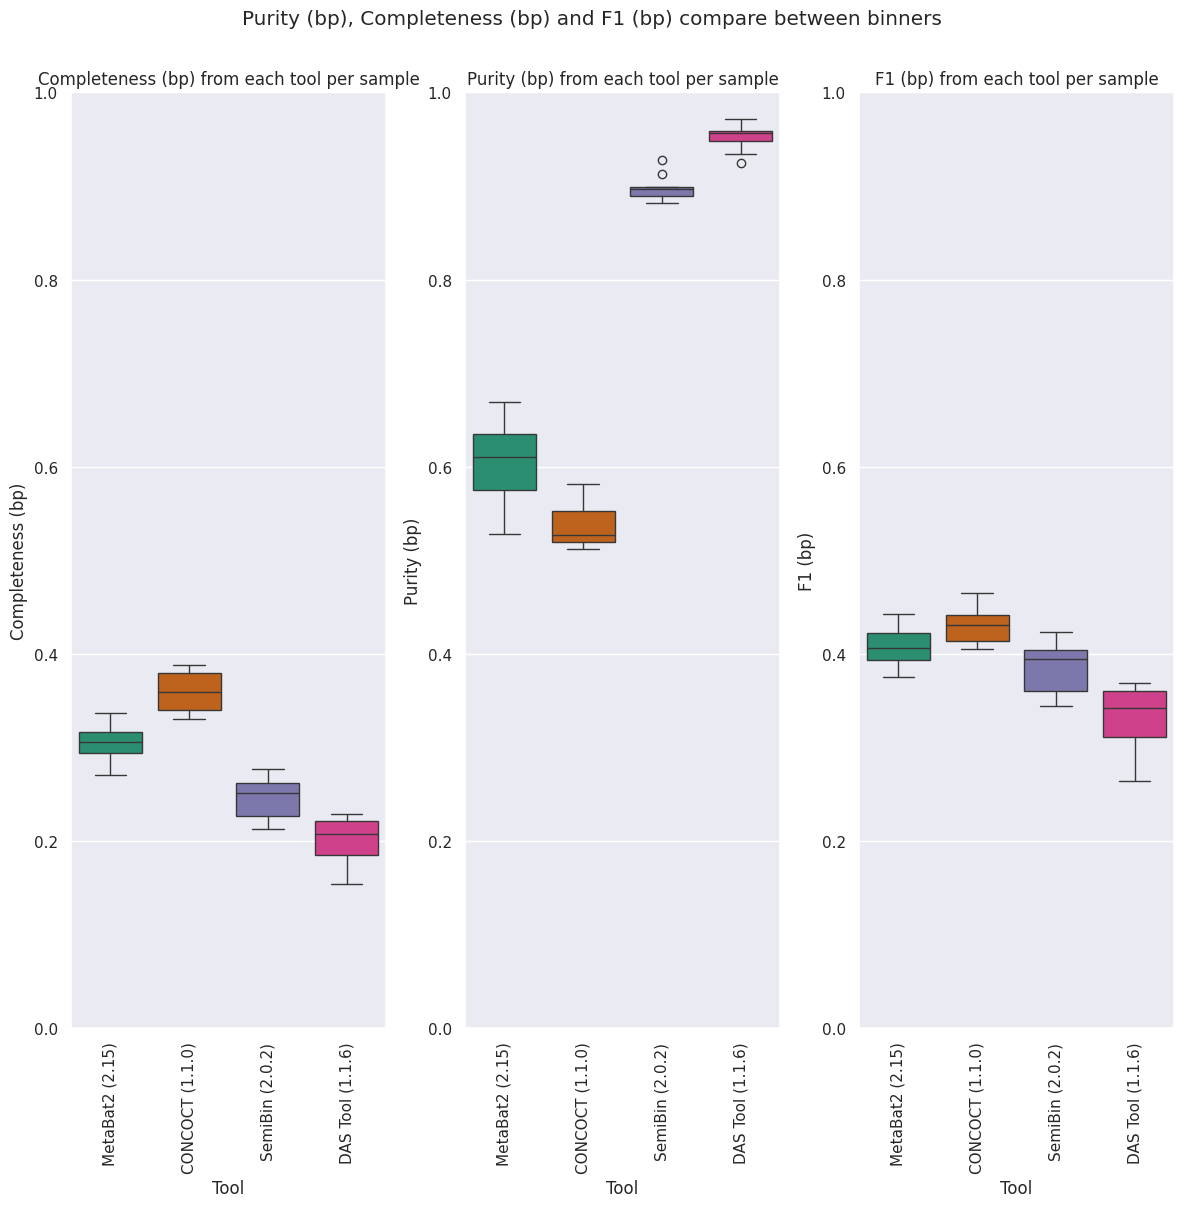

In [81]:
#BOXPLOT FOR PURITY NAD COMPLETENESS

purity_df = df_val.loc[:,["Sample", "Tool", "purity_bp"]]
purity_df.rename(columns={
    'purity_bp': 'Purity (bp)',
}, inplace=True)
purity_df = purity_df[purity_df['Tool'] != 'Gold standard']
print(purity_df.head())

completeness_df = df_val.loc[:,["Sample", "Tool", "completeness_bp"]]
completeness_df.rename(columns={
    'completeness_bp': 'Completeness (bp)',
}, inplace=True)
completeness_df = completeness_df[completeness_df['Tool'] != 'Gold standard']
print(completeness_df.head())

f1_df = df_val.loc[:,["Sample", "Tool", "completeness_bp", "purity_bp"]]
f1_df["F1 (bp)"] = (2 * f1_df['purity_bp'] * f1_df['completeness_bp']) / (f1_df['completeness_bp'] + f1_df['purity_bp'])
f1_df = f1_df[f1_df['Tool'] != 'Gold standard']
print(f1_df.head())


fig, axes = plt.subplots(1, 3, figsize=(12, 12))

fig.suptitle('Purity (bp), Completeness (bp) and F1 (bp) compare between binners', y=1.005)

sns.boxplot(ax=axes[0], x='Tool', y='Completeness (bp)', data=completeness_df, palette='Dark2',legend=False, hue='Tool').set(title="Completeness (bp) from each tool per sample")
axes[0].set_ylim(0,1)
axes[0].tick_params(axis='x', rotation=90)
sns.boxplot(ax=axes[1], x='Tool', y='Purity (bp)', data=purity_df, palette='Dark2',legend=False, hue='Tool').set(title="Purity (bp) from each tool per sample")
axes[1].set_ylim(0,1)
axes[1].tick_params(axis='x', rotation=90)
sns.boxplot(ax=axes[2], x='Tool', y='F1 (bp)', data=f1_df, palette='Dark2',legend=False, hue='Tool').set(title="F1 (bp) from each tool per sample")
axes[2].set_ylim(0,1)
axes[2].tick_params(axis='x', rotation=90)
plt.tight_layout()


     Sample              Tool  Percentage of binned bp (bp)
1  sample_0   MetaBat2 (2.15)                         0.368
2  sample_0   CONCOCT (1.1.0)                         0.474
3  sample_0   SemiBin (2.0.2)                         0.302
4  sample_0  DAS Tool (1.1.6)                         0.232
6  sample_1   MetaBat2 (2.15)                         0.349


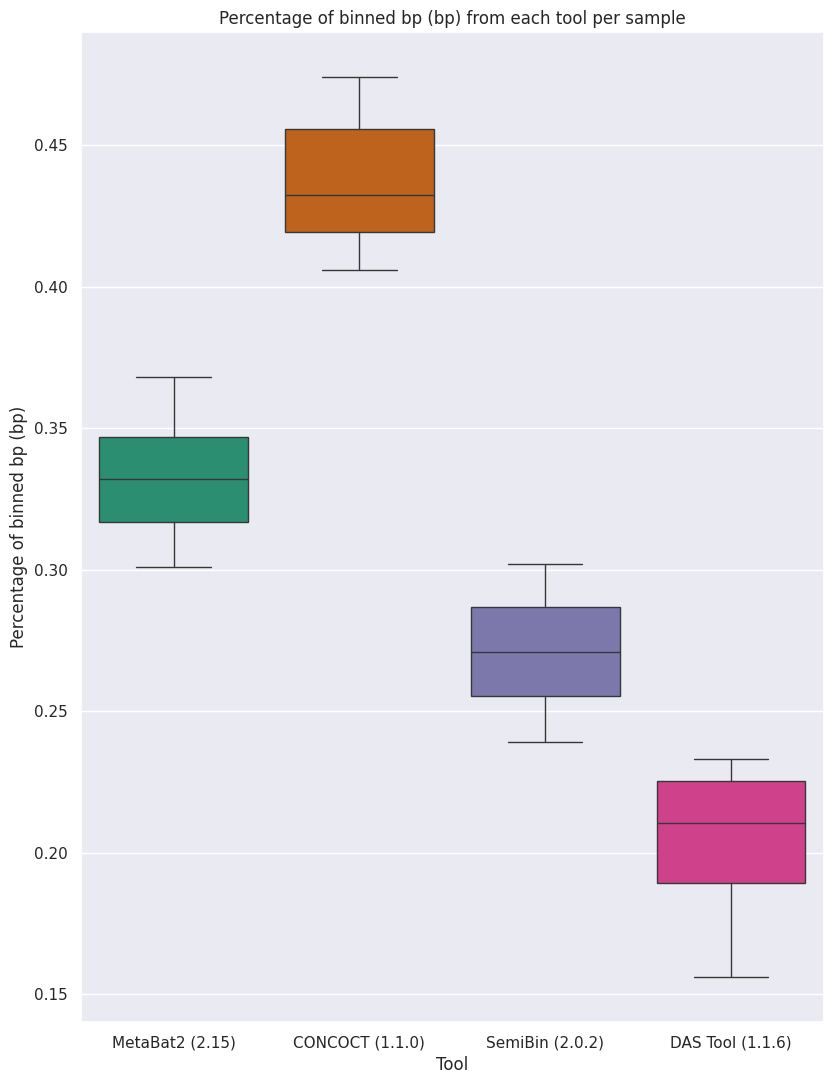

In [82]:
#BOXPLOT FOR Percentage of bp binned

percentage_df = df_val.loc[:,["Sample", "Tool", "percentage_binned_pb"]]
percentage_df.rename(columns={
    'percentage_binned_pb': 'Percentage of binned bp (bp)',
}, inplace=True)
percentage_df = percentage_df[percentage_df['Tool'] != 'Gold standard']
print(percentage_df.head())

plt.figure(figsize=(8.5, 11))
sns.boxplot(x='Tool', y='Percentage of binned bp (bp)', data=percentage_df, palette='Dark2',legend=False, hue='Tool').set(title="Percentage of binned bp (bp) from each tool per sample")
plt.tight_layout()

     Sample              Tool  ARI (bp) binning type
1  sample_0   MetaBat2 (2.15)  0.319594       genome
2  sample_0   CONCOCT (1.1.0)  0.454497       genome
3  sample_0   SemiBin (2.0.2)  0.876319       genome
4  sample_0  DAS Tool (1.1.6)  0.939113       genome
6  sample_1   MetaBat2 (2.15)  0.364031       genome


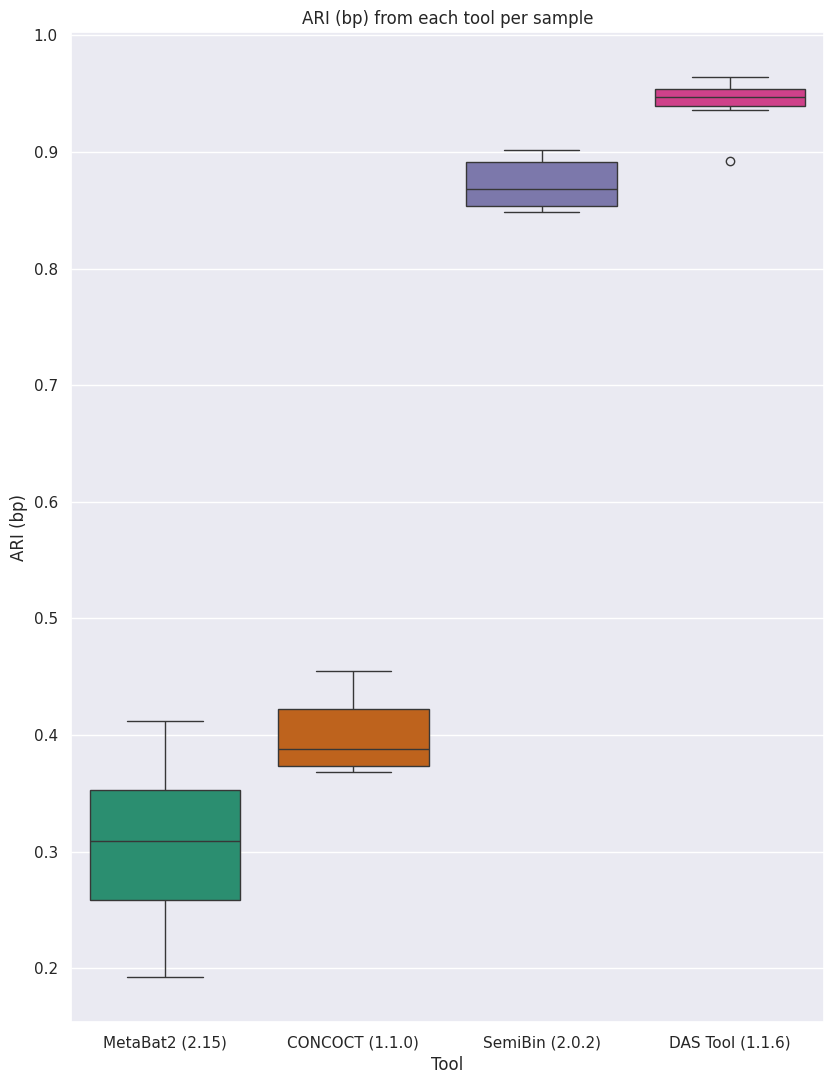

In [83]:
#BOXPLOT FOR ARI

ari_df = df_result.loc[:,["Sample", "Tool", "adjusted_rand_index_bp", 'binning type']]
ari_df.rename(columns={
    'adjusted_rand_index_bp': 'ARI (bp)',
}, inplace=True)
ari_df = ari_df[ari_df['Tool'] != 'Gold standard']
ari_df = ari_df[ari_df['binning type'] == 'genome']
print(ari_df.head())

plt.figure(figsize=(8.5, 11))
sns.boxplot(x='Tool', y='ARI (bp)', data=ari_df, palette='Dark2',legend=False, hue='Tool').set(title="ARI (bp) from each tool per sample")
plt.tight_layout()

     Sample              Tool   RI (bp) binning type
1  sample_0   MetaBat2 (2.15)  0.960980       genome
2  sample_0   CONCOCT (1.1.0)  0.985717       genome
3  sample_0   SemiBin (2.0.2)  0.996719       genome
4  sample_0  DAS Tool (1.1.6)  0.997771       genome
6  sample_1   MetaBat2 (2.15)  0.972326       genome


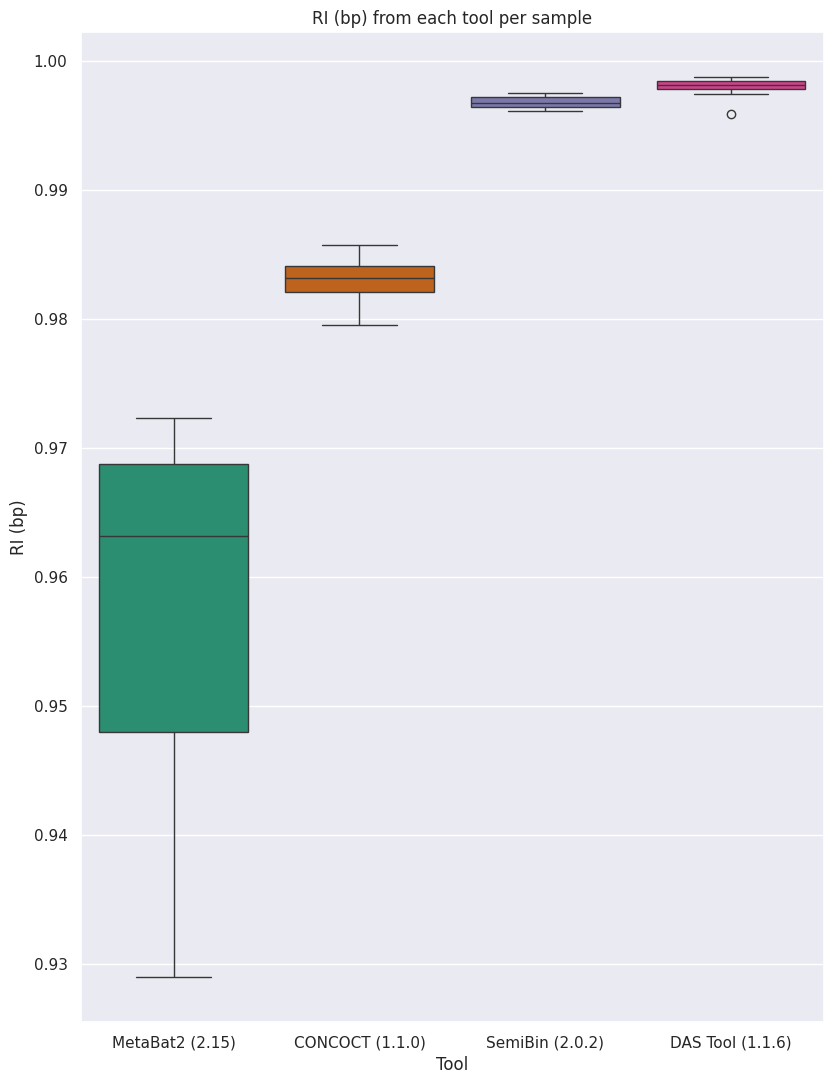

In [84]:
#BOXPLOT FOR RI

ri_df = df_result.loc[:,["Sample", "Tool", "rand_index_bp", 'binning type']]
ri_df.rename(columns={
    'rand_index_bp': 'RI (bp)',
}, inplace=True)
ri_df = ri_df[ri_df['Tool'] != 'Gold standard']
ri_df = ri_df[ri_df['binning type'] == 'genome']
print(ri_df.head())

plt.figure(figsize=(8.5, 11))
sns.boxplot(x='Tool', y='RI (bp)', data=ri_df, palette='Dark2',legend=False, hue='Tool').set(title="RI (bp) from each tool per sample")
plt.tight_layout()

                   Tool  Purity (bp)
1  MetaBAT 2.13-33 (A1)        0.773
2  MetaBAT 2.13-33 (A2)        0.797
3   MetaBAT 0.25.4 (A3)        0.448
4   MetaBinner 1.0 (B1)        0.799
5   MetaBinner 1.0 (B2)        0.801
               Tool  Purity (bp)
1   MetaBat2 (2.15)        0.605
2   CONCOCT (1.1.0)        0.538
3   SemiBin (2.0.2)        0.898
4  DAS Tool (1.1.6)        0.953
               Tool  Purity (bp)
1   MetaBat2 (2.15)        0.505
2   CONCOCT (1.1.0)        0.380
3   SemiBin (2.0.2)        0.832
4  DAS Tool (1.1.6)        0.934


/tmp/ipykernel_757/1871900721.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


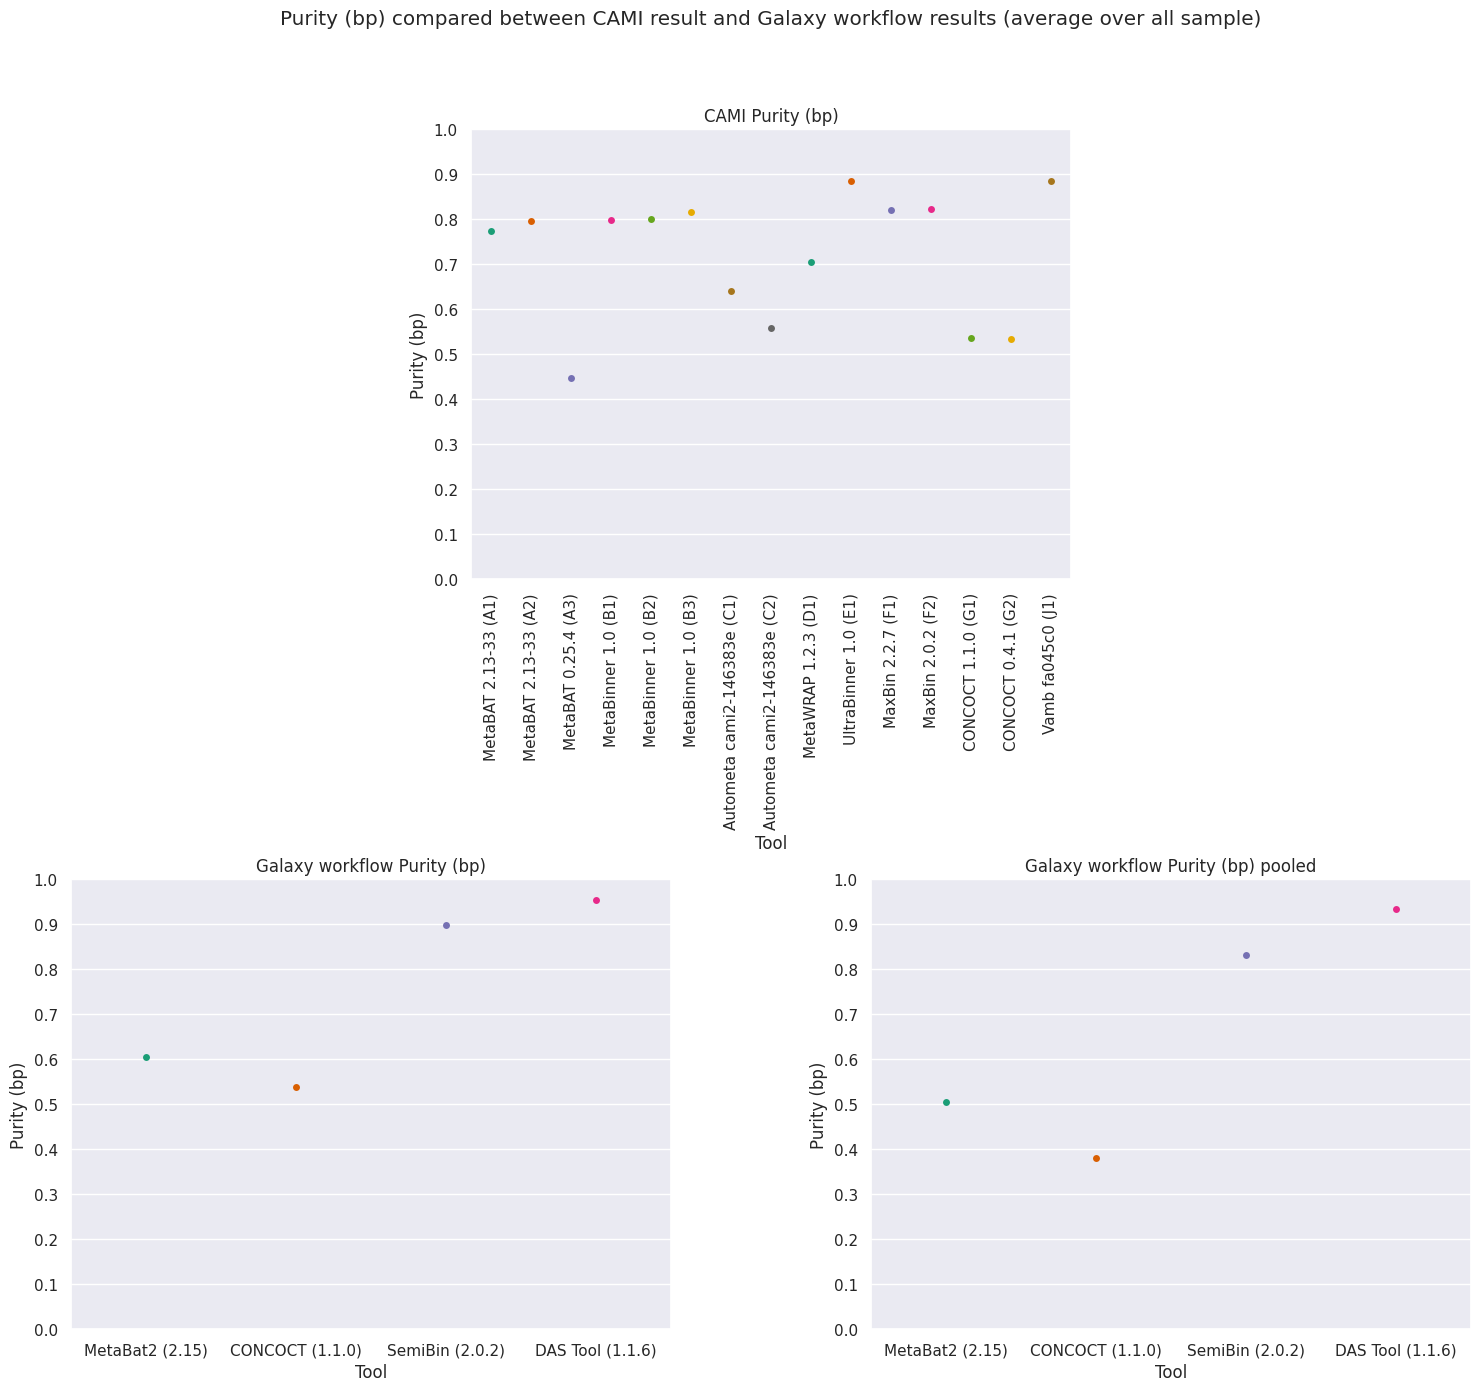

In [85]:
#AVERAGE PURITY COMPARE WITH Galaxy workflow AND CAMI RESULT
df_cami = df_cami_av.loc[:,["Tool", "Purity (bp)"]]

df_cami = df_cami[df_cami['Tool'] != 'Gold standard']
print(df_cami.head())

df_own = df_own_av.loc[:,["Tool", "Purity (bp)"]]

df_own = df_own[df_own['Tool'] != 'Gold standard']
print(df_own.head())

df_pooled = df_pooled_av.loc[:,["Tool", "Purity (bp)"]]

df_pooled = df_pooled[df_pooled['Tool'] != 'Gold standard']
print(df_pooled.head())

fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_axes([0.35, 0.6, 0.3, 0.3])
ax2 = fig.add_axes([0.15, 0.1, 0.3, 0.3])
ax3 = fig.add_axes([0.55, 0.1, 0.3, 0.3])

fig.suptitle('Purity (bp) compared between CAMI result and Galaxy workflow results (average over all sample)')

sns.stripplot(ax=ax1, x='Tool', y='Purity (bp)', data=df_cami, palette='Dark2',legend=False, hue='Tool').set(title="CAMI Purity (bp)")
sns.stripplot(ax=ax2, x='Tool', y='Purity (bp)', data=df_own, palette='Dark2',legend=False, hue='Tool').set(title="Galaxy workflow Purity (bp)")
sns.stripplot(ax=ax3, x='Tool', y='Purity (bp)', data=df_pooled, palette='Dark2',legend=False, hue='Tool').set(title="Galaxy workflow Purity (bp) pooled")


ax1.tick_params(axis='x', rotation=90)
ax1.set_ylim(0, 1)
ax1.set_yticks([i/10.0 for i in range(0, 11)])
ax2.set_ylim(0, 1)
ax2.set_yticks([i/10.0 for i in range(0, 11)])
ax3.set_ylim(0, 1)
ax3.set_yticks([i/10.0 for i in range(0, 11)])
plt.tight_layout()

                   Tool  Completeness (bp)
1  MetaBAT 2.13-33 (A1)              0.393
2  MetaBAT 2.13-33 (A2)              0.386
3   MetaBAT 0.25.4 (A3)              0.401
4   MetaBinner 1.0 (B1)              0.670
5   MetaBinner 1.0 (B2)              0.666
               Tool  Completeness (bp)
1   MetaBat2 (2.15)              0.307
2   CONCOCT (1.1.0)              0.360
3   SemiBin (2.0.2)              0.247
4  DAS Tool (1.1.6)              0.201
               Tool  Completeness (bp)
1   MetaBat2 (2.15)              0.644
2   CONCOCT (1.1.0)              0.678
3   SemiBin (2.0.2)              0.538
4  DAS Tool (1.1.6)              0.442


/tmp/ipykernel_757/3082477954.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


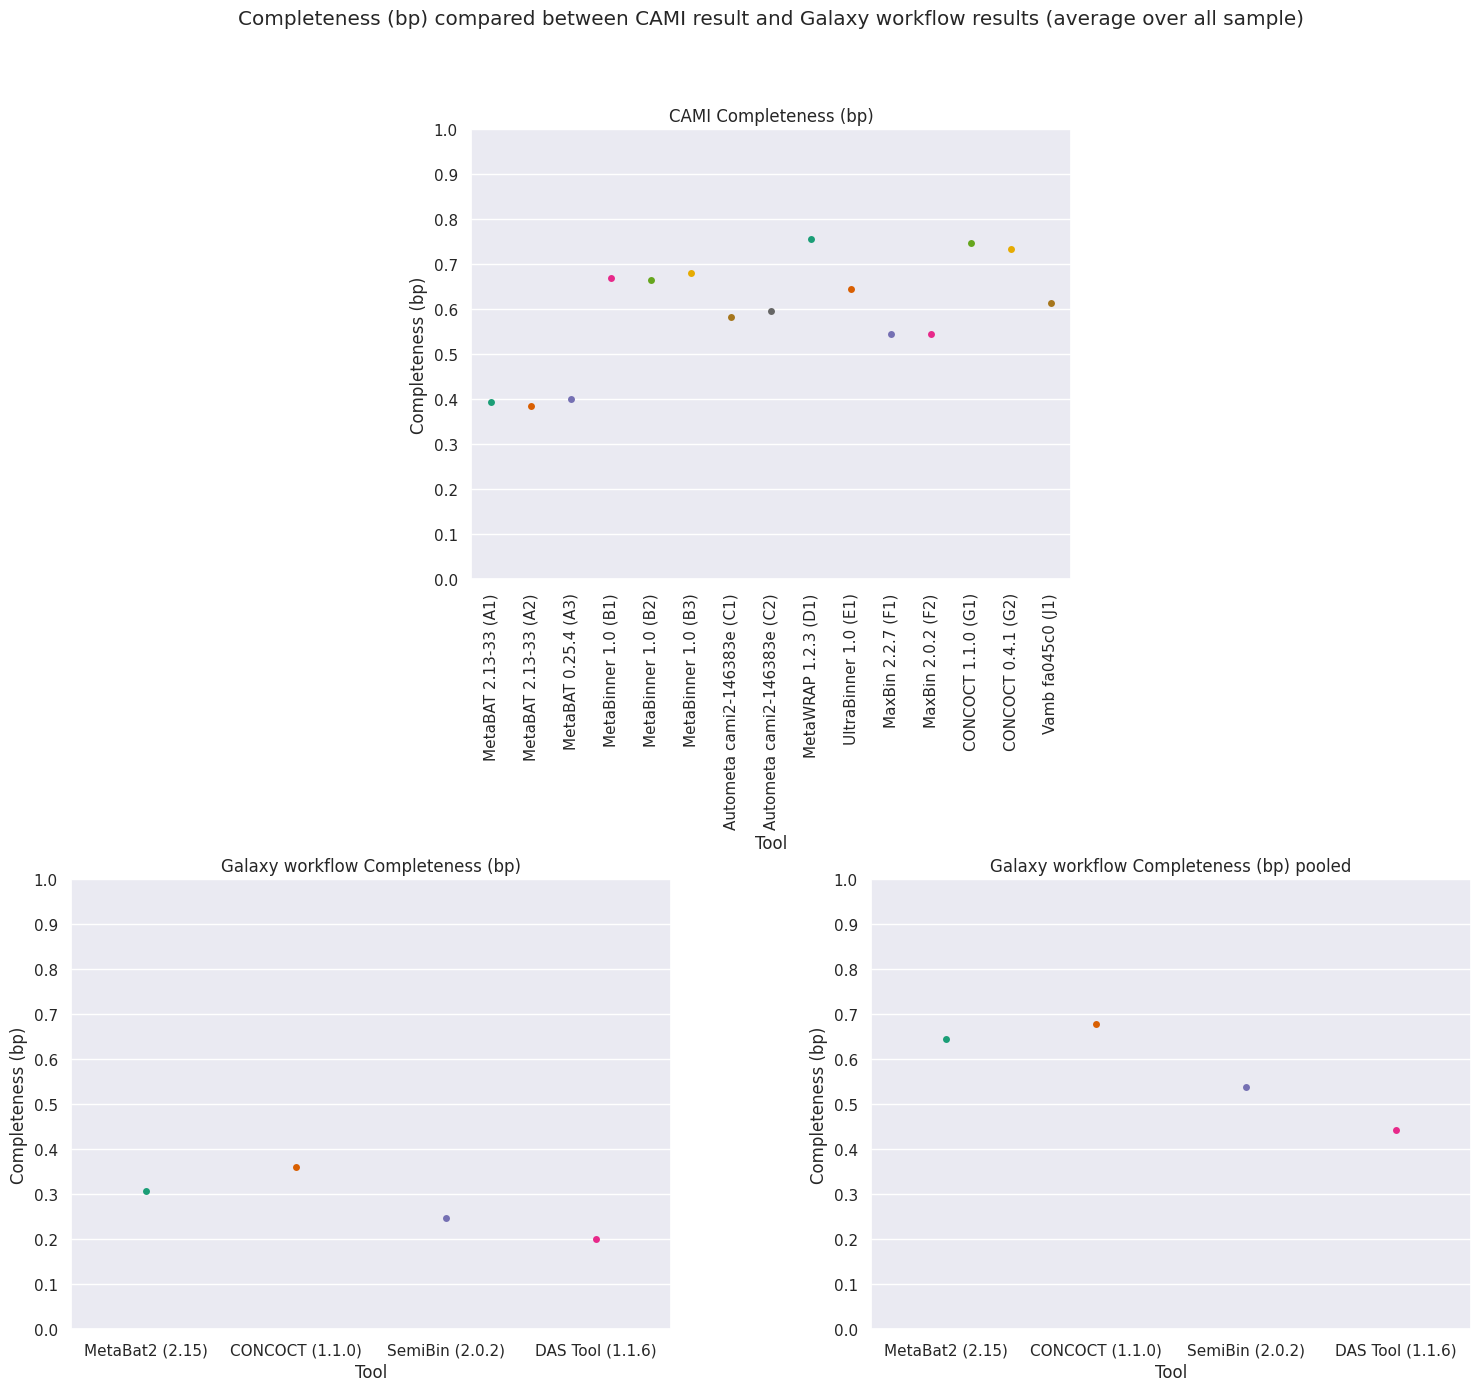

In [86]:
#AVERAGE COMPLETENESS COMPARE WITH Galaxy workflow AND CAMI RESULT
df_cami = df_cami_av.loc[:,["Tool", "Completeness (bp)"]]

df_cami = df_cami[df_cami['Tool'] != 'Gold standard']
print(df_cami.head())

df_own = df_own_av.loc[:,["Tool", "Completeness (bp)"]]

df_own = df_own[df_own['Tool'] != 'Gold standard']
print(df_own.head())

df_pooled = df_pooled_av.loc[:,["Tool", "Completeness (bp)"]]

df_pooled = df_pooled[df_pooled['Tool'] != 'Gold standard']
print(df_pooled.head())

fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_axes([0.35, 0.6, 0.3, 0.3])
ax2 = fig.add_axes([0.15, 0.1, 0.3, 0.3])
ax3 = fig.add_axes([0.55, 0.1, 0.3, 0.3])

fig.suptitle('Completeness (bp) compared between CAMI result and Galaxy workflow results (average over all sample)')

sns.stripplot(ax=ax1, x='Tool', y='Completeness (bp)', data=df_cami, palette='Dark2',legend=False, hue='Tool').set(title="CAMI Completeness (bp)")
sns.stripplot(ax=ax2, x='Tool', y='Completeness (bp)', data=df_own, palette='Dark2',legend=False, hue='Tool').set(title="Galaxy workflow Completeness (bp)")
sns.stripplot(ax=ax3, x='Tool', y='Completeness (bp)', data=df_pooled, palette='Dark2',legend=False, hue='Tool').set(title="Galaxy workflow Completeness (bp) pooled")


ax1.tick_params(axis='x', rotation=90)
ax1.set_ylim(0, 1)
ax1.set_yticks([i/10.0 for i in range(0, 11)])
ax2.set_ylim(0, 1)
ax2.set_yticks([i/10.0 for i in range(0, 11)])
ax3.set_ylim(0, 1)
ax3.set_yticks([i/10.0 for i in range(0, 11)])
plt.tight_layout()

                   Tool  RI (bp)
1  MetaBAT 2.13-33 (A1)    0.997
2  MetaBAT 2.13-33 (A2)    0.998
3   MetaBAT 0.25.4 (A3)    0.973
4   MetaBinner 1.0 (B1)    0.999
5   MetaBinner 1.0 (B2)    0.999
               Tool  RI (bp)
1   MetaBat2 (2.15)    0.957
2   CONCOCT (1.1.0)    0.983
3   SemiBin (2.0.2)    0.997
4  DAS Tool (1.1.6)    0.998
               Tool  RI (bp)
1   MetaBat2 (2.15)    0.969
2   CONCOCT (1.1.0)    0.992
3   SemiBin (2.0.2)    0.999
4  DAS Tool (1.1.6)    0.999


/tmp/ipykernel_757/4121750525.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


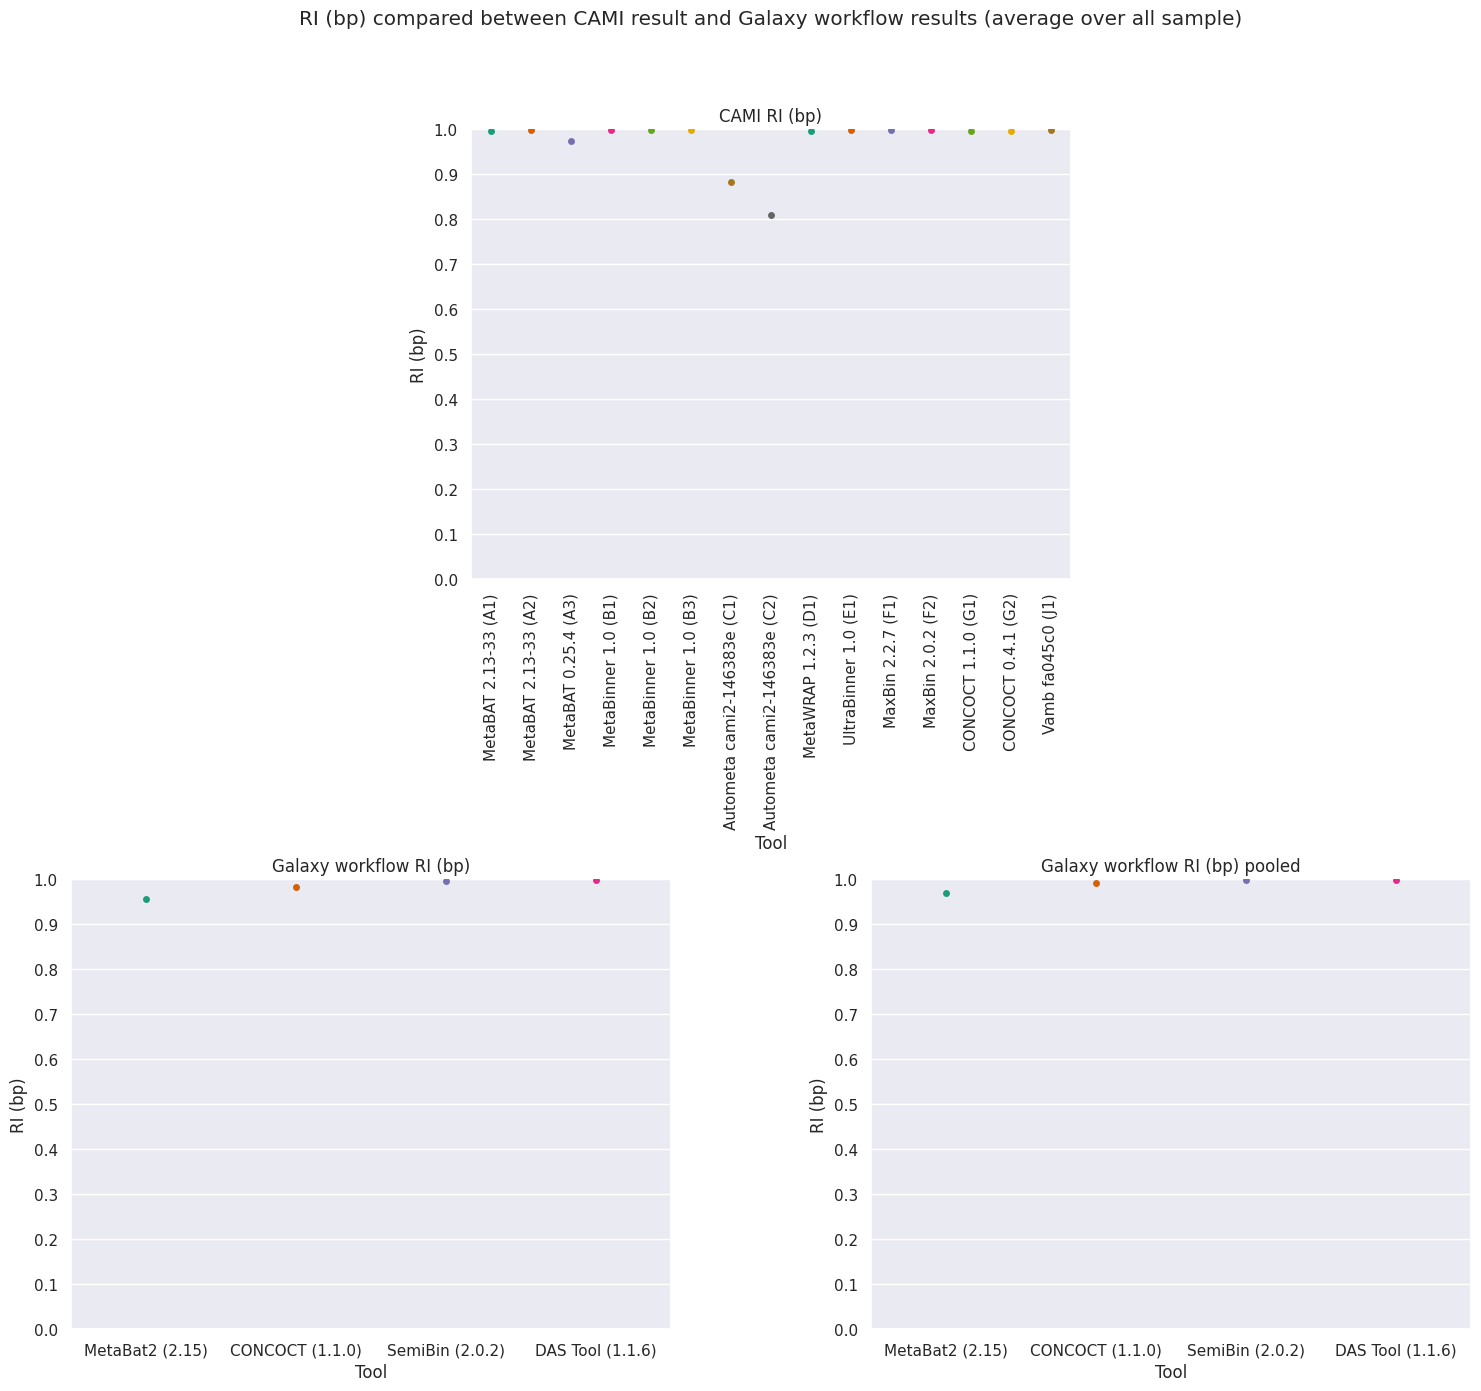

In [87]:
#AVERAGE RI COMPARE WITH Galaxy workflow AND CAMI RESULT
df_cami = df_cami_av.loc[:,["Tool", "Rand index (bp)"]]
df_cami.rename(columns={
    'Rand index (bp)': 'RI (bp)',
}, inplace=True)
df_cami = df_cami[df_cami['Tool'] != 'Gold standard']
print(df_cami.head())

df_own = df_own_av.loc[:,["Tool", "Rand index (bp)"]]
df_own.rename(columns={
    'Rand index (bp)': 'RI (bp)',
}, inplace=True)
df_own = df_own[df_own['Tool'] != 'Gold standard']
print(df_own.head())

df_pooled = df_pooled_av.loc[:,["Tool", "Rand index (bp)"]]
df_pooled.rename(columns={
    'Rand index (bp)': 'RI (bp)',
}, inplace=True)
df_pooled = df_pooled[df_pooled['Tool'] != 'Gold standard']
print(df_pooled.head())

fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_axes([0.35, 0.6, 0.3, 0.3])
ax2 = fig.add_axes([0.15, 0.1, 0.3, 0.3])
ax3 = fig.add_axes([0.55, 0.1, 0.3, 0.3])

fig.suptitle('RI (bp) compared between CAMI result and Galaxy workflow results (average over all sample)')

sns.stripplot(ax=ax1, x='Tool', y='RI (bp)', data=df_cami, palette='Dark2',legend=False, hue='Tool').set(title="CAMI RI (bp)")
sns.stripplot(ax=ax2, x='Tool', y='RI (bp)', data=df_own, palette='Dark2', legend=False, hue='Tool').set(title="Galaxy workflow RI (bp)")
sns.stripplot(ax=ax3, x='Tool', y='RI (bp)', data=df_pooled, palette='Dark2',legend=False, hue='Tool').set(title="Galaxy workflow RI (bp) pooled")


ax1.tick_params(axis='x', rotation=90)
ax1.set_ylim(0, 1)
ax1.set_yticks([i/10.0 for i in range(0, 11)])
ax2.set_ylim(0, 1)
ax2.set_yticks([i/10.0 for i in range(0, 11)])
ax3.set_ylim(0, 1)
ax3.set_yticks([i/10.0 for i in range(0, 11)])
plt.tight_layout()

                   Tool  ARI (bp)
1  MetaBAT 2.13-33 (A1)     0.703
2  MetaBAT 2.13-33 (A2)     0.742
3   MetaBAT 0.25.4 (A3)     0.166
4   MetaBinner 1.0 (B1)     0.744
5   MetaBinner 1.0 (B2)     0.750
               Tool  ARI (bp)
1   MetaBat2 (2.15)     0.300
2   CONCOCT (1.1.0)     0.398
3   SemiBin (2.0.2)     0.872
4  DAS Tool (1.1.6)     0.944
               Tool  ARI (bp)
1   MetaBat2 (2.15)     0.107
2   CONCOCT (1.1.0)     0.262
3   SemiBin (2.0.2)     0.804
4  DAS Tool (1.1.6)     0.929


/tmp/ipykernel_757/833057915.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


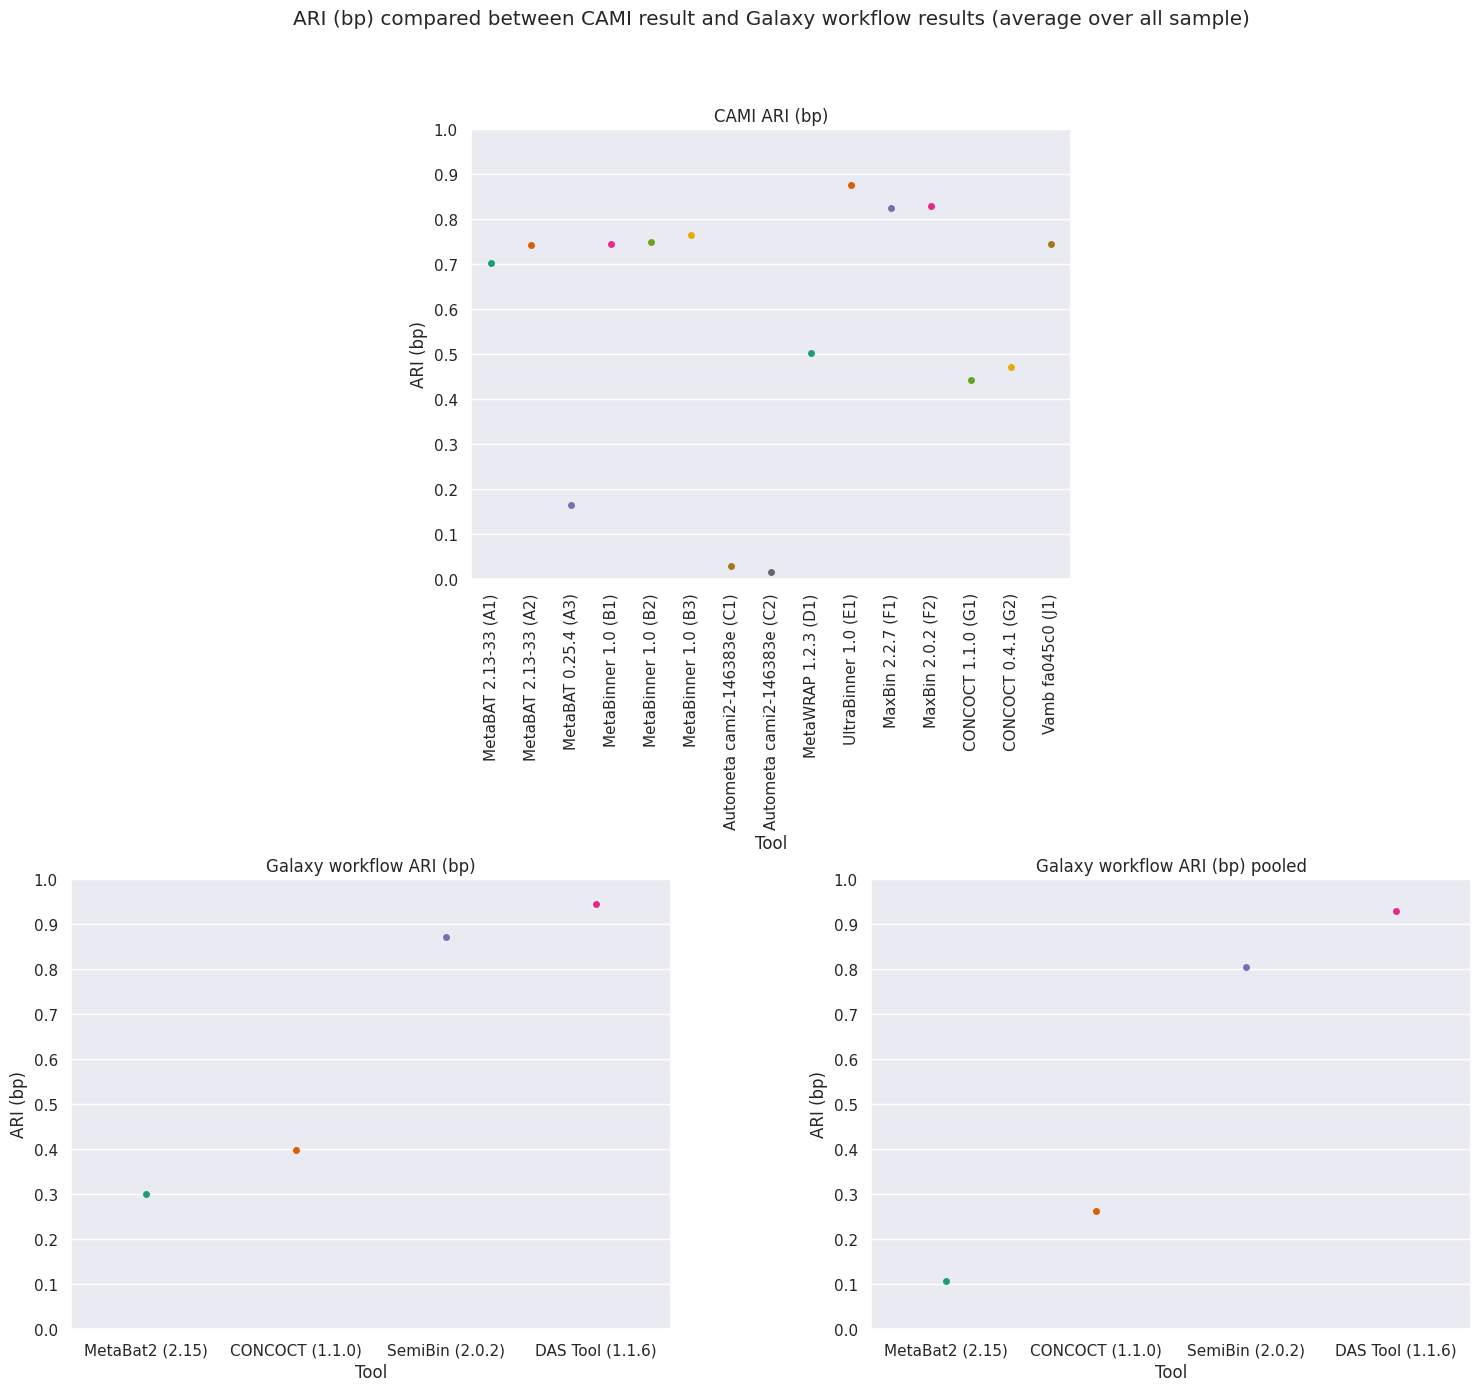

In [88]:
#AVERAGE ARI COMPARE WITH Galaxy workflow AND CAMI RESULT
df_cami = df_cami_av.loc[:,["Tool", "Adjusted Rand index (bp)"]]
df_cami.rename(columns={
    'Adjusted Rand index (bp)': 'ARI (bp)',
}, inplace=True)
df_cami = df_cami[df_cami['Tool'] != 'Gold standard']
print(df_cami.head())

df_own = df_own_av.loc[:,["Tool", "Adjusted Rand index (bp)"]]
df_own.rename(columns={
    'Adjusted Rand index (bp)': 'ARI (bp)',
}, inplace=True)
df_own = df_own[df_own['Tool'] != 'Gold standard']
print(df_own.head())

df_pooled = df_pooled_av.loc[:,["Tool", "Adjusted Rand index (bp)"]]
df_pooled.rename(columns={
    'Adjusted Rand index (bp)': 'ARI (bp)',
}, inplace=True)
df_pooled = df_pooled[df_pooled['Tool'] != 'Gold standard']
print(df_pooled.head())

fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_axes([0.35, 0.6, 0.3, 0.3])
ax2 = fig.add_axes([0.15, 0.1, 0.3, 0.3])
ax3 = fig.add_axes([0.55, 0.1, 0.3, 0.3])

fig.suptitle('ARI (bp) compared between CAMI result and Galaxy workflow results (average over all sample)')

sns.stripplot(ax=ax1, x='Tool', y='ARI (bp)', data=df_cami, palette='Dark2', legend=False, hue='Tool').set(title="CAMI ARI (bp)")
sns.stripplot(ax=ax2, x='Tool', y='ARI (bp)', data=df_own, palette='Dark2',legend=False, hue='Tool').set(title="Galaxy workflow ARI (bp)")
sns.stripplot(ax=ax3, x='Tool', y='ARI (bp)', data=df_pooled, palette='Dark2',legend=False, hue='Tool').set(title="Galaxy workflow ARI (bp) pooled")


ax1.tick_params(axis='x', rotation=90)
ax1.set_ylim(0, 1)
ax1.set_yticks([i/10.0 for i in range(0, 11)])
ax2.set_ylim(0, 1)
ax2.set_yticks([i/10.0 for i in range(0, 11)])
ax3.set_ylim(0, 1)
ax3.set_yticks([i/10.0 for i in range(0, 11)])
plt.tight_layout()

                   Tool  Percentage of binned bp (bp)
1  MetaBAT 2.13-33 (A1)                         0.406
2  MetaBAT 2.13-33 (A2)                         0.398
3   MetaBAT 0.25.4 (A3)                         0.456
4   MetaBinner 1.0 (B1)                         0.804
5   MetaBinner 1.0 (B2)                         0.804
               Tool  Percentage of binned bp (bp)
1   MetaBat2 (2.15)                         0.333
2   CONCOCT (1.1.0)                         0.436
3   SemiBin (2.0.2)                         0.271
4  DAS Tool (1.1.6)                         0.205
               Tool  Percentage of binned bp (bp)
1   MetaBat2 (2.15)                         0.700
2   CONCOCT (1.1.0)                         0.804
3   SemiBin (2.0.2)                         0.619
4  DAS Tool (1.1.6)                         0.455


/tmp/ipykernel_757/869988072.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


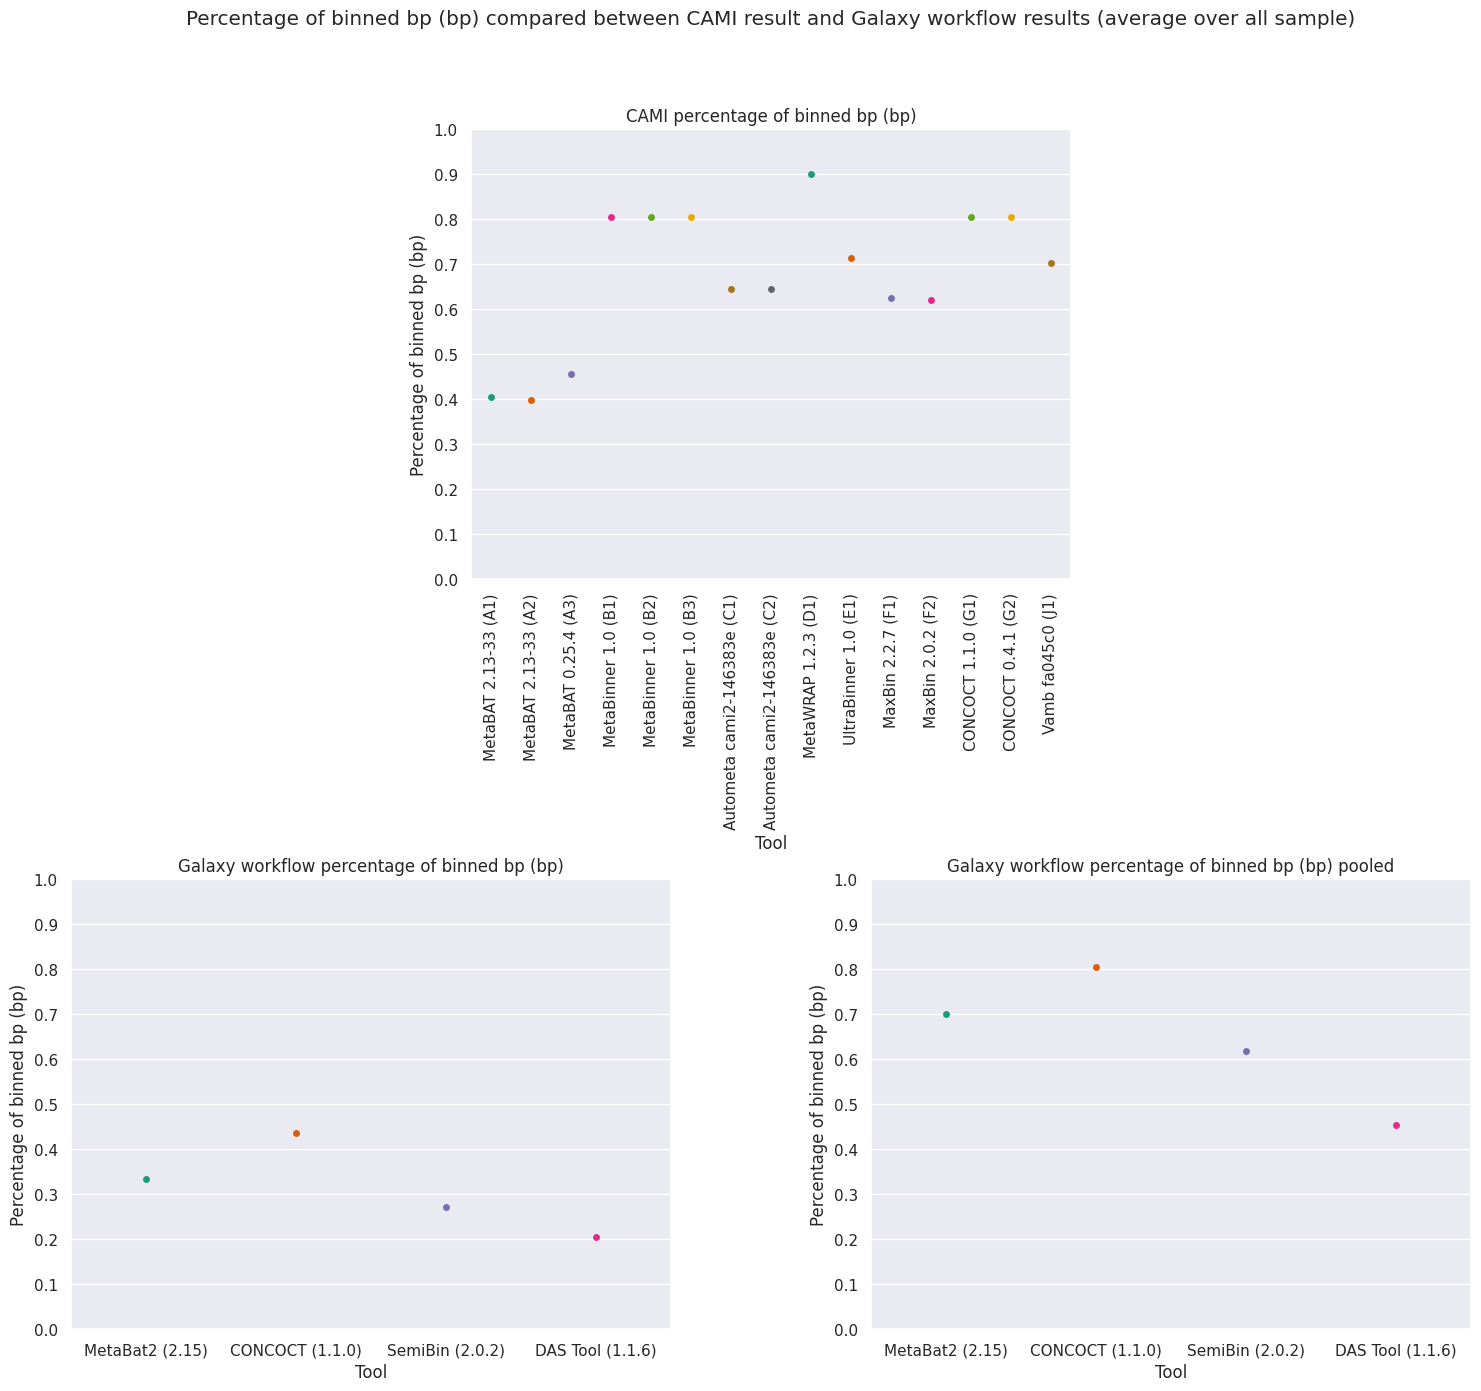

In [89]:
#AVERAGE PERCENTAGE OF BINNED PB COMPARE WITH Galaxy workflow AND CAMI RESULT
df_cami = df_cami_av.loc[:,["Tool", "Percentage of binned bp"]]
df_cami.rename(columns={
    'Percentage of binned bp': 'Percentage of binned bp (bp)',
}, inplace=True)
df_cami = df_cami[df_cami['Tool'] != 'Gold standard']
print(df_cami.head())

df_own = df_own_av.loc[:,["Tool", "Percentage of binned bp"]]
df_own.rename(columns={
    'Percentage of binned bp': 'Percentage of binned bp (bp)',
}, inplace=True)
df_own = df_own[df_own['Tool'] != 'Gold standard']
print(df_own.head())

df_pooled = df_pooled_av.loc[:,["Tool", "Percentage of binned bp"]]
df_pooled.rename(columns={
    'Percentage of binned bp': 'Percentage of binned bp (bp)',
}, inplace=True)
df_pooled = df_pooled[df_pooled['Tool'] != 'Gold standard']
print(df_pooled.head())

fig = plt.figure(figsize=(20, 15))
ax1 = fig.add_axes([0.35, 0.6, 0.3, 0.3])
ax2 = fig.add_axes([0.15, 0.1, 0.3, 0.3])
ax3 = fig.add_axes([0.55, 0.1, 0.3, 0.3])

fig.suptitle('Percentage of binned bp (bp) compared between CAMI result and Galaxy workflow results (average over all sample)')

sns.stripplot(ax=ax1, x='Tool', y='Percentage of binned bp (bp)', data=df_cami, palette='Dark2', legend=False, hue='Tool').set(title="CAMI percentage of binned bp (bp)")
sns.stripplot(ax=ax2, x='Tool', y='Percentage of binned bp (bp)', data=df_own, palette='Dark2', legend=False, hue='Tool').set(title="Galaxy workflow percentage of binned bp (bp)")
sns.stripplot(ax=ax3, x='Tool', y='Percentage of binned bp (bp)', data=df_pooled, palette='Dark2',legend=False, hue='Tool').set(title="Galaxy workflow percentage of binned bp (bp) pooled")


ax1.tick_params(axis='x', rotation=90)
ax1.set_ylim(0, 1)
ax1.set_yticks([i/10.0 for i in range(0, 11)])
ax2.set_ylim(0, 1)
ax2.set_yticks([i/10.0 for i in range(0, 11)])
ax3.set_ylim(0, 1)
ax3.set_yticks([i/10.0 for i in range(0, 11)])
plt.tight_layout()

     Sample              Tool Contamination  > 50% completeness
0  sample_0   CONCOCT (1.1.0)         < 10%                  51
1  sample_0   CONCOCT (1.1.0)          < 5%                  46
2  sample_0  DAS Tool (1.1.6)         < 10%                  54
3  sample_0  DAS Tool (1.1.6)          < 5%                  51
6  sample_0   MetaBat2 (2.15)         < 10%                  45
      Sample              Tool Contamination  > 50% completeness
0   sample_0   CONCOCT (1.1.0)         < 10%                  51
2   sample_0  DAS Tool (1.1.6)         < 10%                  54
6   sample_0   MetaBat2 (2.15)         < 10%                  45
8   sample_0   SemiBin (2.0.2)         < 10%                  58
10  sample_1   CONCOCT (1.1.0)         < 10%                  46
      Sample              Tool Contamination  > 50% completeness
1   sample_0   CONCOCT (1.1.0)          < 5%                  46
3   sample_0  DAS Tool (1.1.6)          < 5%                  51
7   sample_0   MetaBat2 (2.15) 

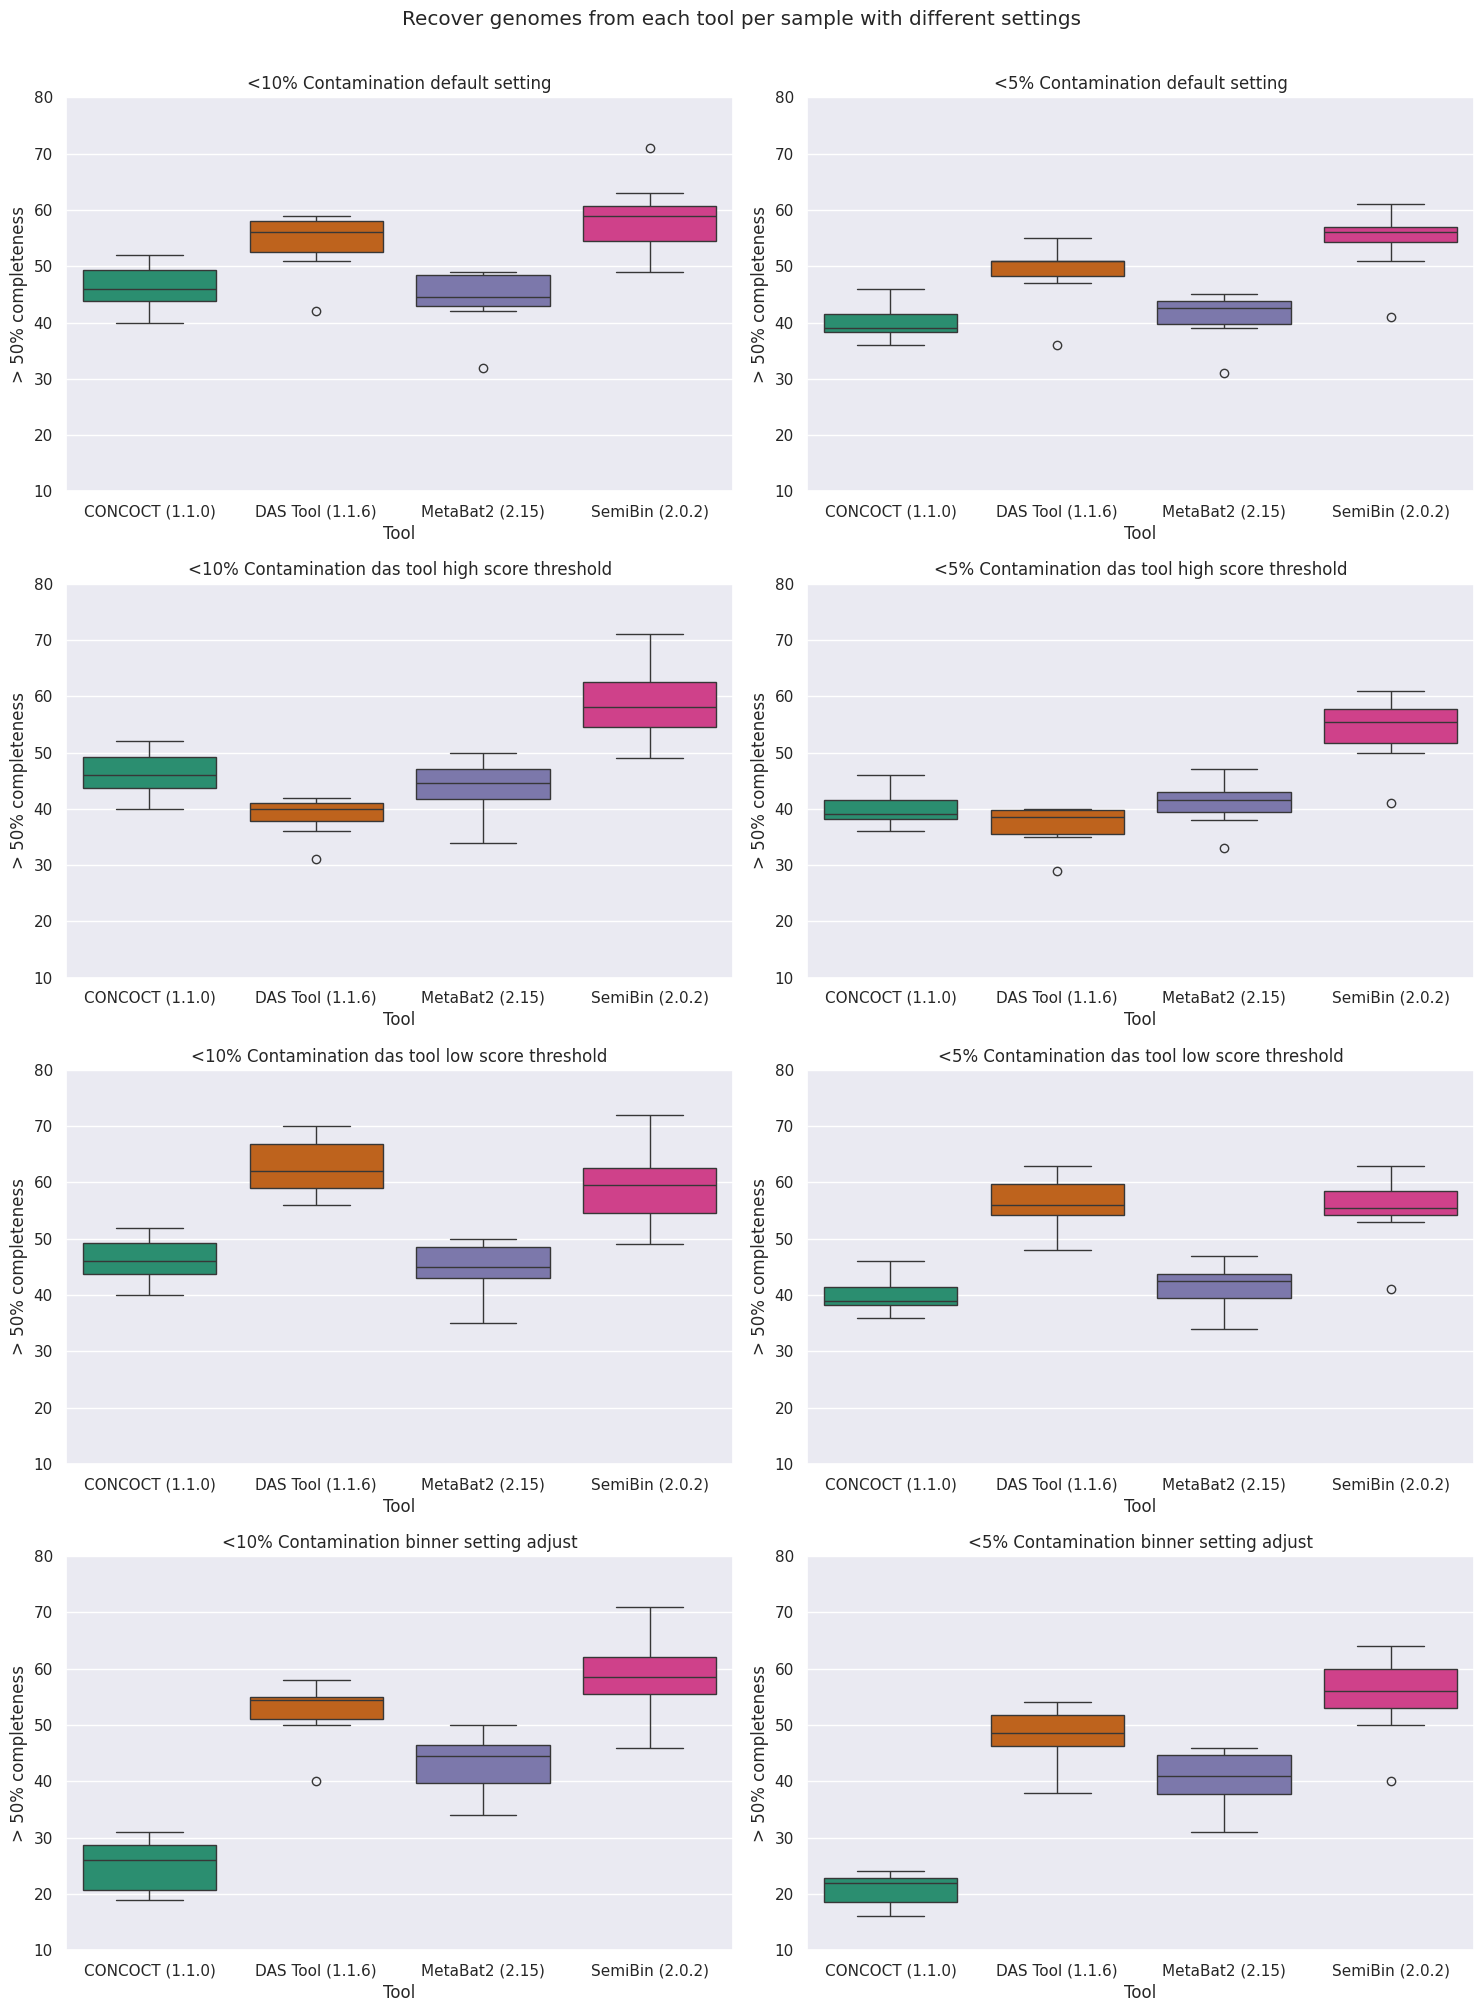

In [90]:
#GENOME RECOVER 
df_genome_filtered = df_genome.loc[:,["Sample", "Tool", "Contamination", '> 50% completeness']]
df_genome_filtered = df_genome_filtered[df_genome_filtered['Tool'] != 'Gold standard']
print(df_genome_filtered.head())

df_smaller_10_cont = df_genome_filtered[df_genome_filtered['Contamination'] == '< 10%']
df_smaller_5_cont = df_genome_filtered[df_genome_filtered['Contamination'] == '< 5%']

print(df_smaller_10_cont.head())
print(df_smaller_5_cont.head())

df_genome_filtered_high = df_high.loc[:,["Sample", "Tool", "Contamination", '> 50% completeness']]
df_genome_filtered_high = df_genome_filtered_high[df_genome_filtered_high['Tool'] != 'Gold standard']
print(df_genome_filtered_high.head())

df_smaller_10_cont_high = df_genome_filtered_high[df_genome_filtered_high['Contamination'] == '< 10%']
df_smaller_5_cont_high = df_genome_filtered_high[df_genome_filtered_high['Contamination'] == '< 5%']

print(df_smaller_10_cont_high.head())
print(df_smaller_5_cont_high.head())

df_genome_filtered_low = df_low.loc[:,["Sample", "Tool", "Contamination", '> 50% completeness']]
df_genome_filtered_low = df_genome_filtered_low[df_genome_filtered_low['Tool'] != 'Gold standard']
print(df_genome_filtered_low.head())

df_smaller_10_cont_low = df_genome_filtered_low[df_genome_filtered_low['Contamination'] == '< 10%']
df_smaller_5_cont_low = df_genome_filtered_low[df_genome_filtered_low['Contamination'] == '< 5%']

print(df_smaller_10_cont_low.head())
print(df_smaller_5_cont_low.head())

df_genome_filtered_binner = df_binner.loc[:,["Sample", "Tool", "Contamination", '> 50% completeness']]
df_genome_filtered_binner = df_genome_filtered_binner[df_genome_filtered_binner['Tool'] != 'Gold standard']
print(df_genome_filtered_binner.head())

df_smaller_10_cont_binner = df_genome_filtered_binner[df_genome_filtered_binner['Contamination'] == '< 10%']
df_smaller_5_cont_binner = df_genome_filtered_binner[df_genome_filtered_binner['Contamination'] == '< 5%']

print(df_smaller_10_cont_binner.head())
print(df_smaller_5_cont_binner.head())

fig, axes = plt.subplots(4, 2, figsize=(15, 20))

fig.suptitle('Recover genomes from each tool per sample with different settings', y=1.005)

sns.boxplot(ax=axes[0, 0], x='Tool', y='> 50% completeness', data=df_smaller_10_cont, palette='Dark2', legend=False, hue='Tool').set(title="<10% Contamination default setting")
sns.boxplot(ax=axes[0, 1], x='Tool', y='> 50% completeness', data=df_smaller_5_cont, palette='Dark2', legend=False, hue='Tool').set(title="<5% Contamination default setting")
sns.boxplot(ax=axes[1, 0], x='Tool', y='> 50% completeness', data=df_smaller_10_cont_high, palette='Dark2', legend=False, hue='Tool').set(title="<10% Contamination das tool high score threshold")
sns.boxplot(ax=axes[1, 1], x='Tool', y='> 50% completeness', data=df_smaller_5_cont_high, palette='Dark2', legend=False, hue='Tool').set(title="<5% Contamination das tool high score threshold")
sns.boxplot(ax=axes[2, 0], x='Tool', y='> 50% completeness', data=df_smaller_10_cont_low, palette='Dark2', legend=False, hue='Tool').set(title="<10% Contamination das tool low score threshold")
sns.boxplot(ax=axes[2, 1], x='Tool', y='> 50% completeness', data=df_smaller_5_cont_low, palette='Dark2', legend=False, hue='Tool').set(title="<5% Contamination das tool low score threshold")
sns.boxplot(ax=axes[3, 0], x='Tool', y='> 50% completeness', data=df_smaller_10_cont_binner, palette='Dark2', legend=False, hue='Tool').set(title="<10% Contamination binner setting adjust")
sns.boxplot(ax=axes[3, 1], x='Tool', y='> 50% completeness', data=df_smaller_5_cont_binner, palette='Dark2', legend=False, hue='Tool').set(title="<5% Contamination binner setting adjust")

axes[0, 0].set_ylim(10, 80)
axes[1, 0].set_ylim(10, 80)
axes[2, 0].set_ylim(10, 80)
axes[3, 0].set_ylim(10, 80)
axes[0, 1].set_ylim(10, 80)
axes[1, 1].set_ylim(10, 80)
axes[2, 1].set_ylim(10, 80)
axes[3, 1].set_ylim(10, 80)
plt.tight_layout()

In [91]:
dfs = []
for k in range(0,10):
    url = f"https://raw.githubusercontent.com/CAMI-challenge/second_challenge_evaluation/501b543f65d62e5c1d6c3813be0badcac5e079ca/binning/taxonomic_binning/marine_dataset/data/results/amber_marine_short_reads_sample_{k}/results.tsv"
    df = pd.read_csv(url, sep="\t")
    dfs.append(df)

# Merge all DataFrames into a single DataFrame
merged_df = pd.concat(dfs, ignore_index=True)

html = merged_df.to_html(index=False)
scrollable_html = f'''
<div style="height: 400px; overflow: auto;">
    {html}
</div>
'''
display(HTML(scrollable_html))



Accuracy (bp),Accuracy (bp) (unfiltered),Accuracy (seq),Accuracy (seq) (unfiltered),Adjusted Rand index (bp),Adjusted Rand index (bp) (unfiltered),Adjusted Rand index (seq),Adjusted Rand index (seq) (unfiltered),Average completeness (bp),Average completeness (bp) (unfiltered),Average completeness (seq),Average completeness (seq) (unfiltered),Average purity (bp),Average purity (bp) (unfiltered),Average purity (seq),Average purity (seq) (unfiltered),CAMI 1 F1 score (bp),CAMI 1 F1 score (bp) (unfiltered),CAMI 1 F1 score (seq),CAMI 1 F1 score (seq) (unfiltered),CAMI 1 average completeness (bp),CAMI 1 average completeness (bp) (unfiltered),CAMI 1 average completeness (seq),CAMI 1 average completeness (seq) (unfiltered),CAMI 1 std error of av. completeness (bp),CAMI 1 std error of av. completeness (bp) (unfiltered),CAMI 1 std error of av. completeness (seq),CAMI 1 std error of av. completeness (seq) (unfiltered),Completeness (bp),Completeness (bp) (unfiltered),Completeness (seq),Completeness (seq) (unfiltered),F1 score (bp),F1 score (bp) (unfiltered),F1 score (seq),F1 score (seq) (unfiltered),F1 score for sample (bp),F1 score for sample (bp) (unfiltered),F1 score for sample (seq),F1 score for sample (seq) (unfiltered),Misclassification rate (bp),Misclassification rate (bp) (unfiltered),Misclassification rate (seq),Misclassification rate (seq) (unfiltered),Percentage of binned bp,Percentage of binned bp (unfiltered),Percentage of binned sequences,Percentage of binned sequences (unfiltered),Purity (bp),Purity (bp) (unfiltered),Purity (seq),Purity (seq) (unfiltered),Rand index (bp),Rand index (bp) (unfiltered),Rand index (seq),Rand index (seq) (unfiltered),Sample,Std error of av. completeness (bp),Std error of av. completeness (bp) (unfiltered),Std error of av. completeness (seq),Std error of av. completeness (seq) (unfiltered),Std error of av. purity (bp),Std error of av. purity (bp) (unfiltered),Std error of av. purity (seq),Std error of av. purity (seq) (unfiltered),Tool,UniFrac (bp),UniFrac (bp) (unfiltered),UniFrac (seq),UniFrac (seq) (unfiltered),avg_precision_bp_var,avg_precision_bp_var (unfiltered),avg_recall_bp_var,avg_recall_bp_var (unfiltered),avg_recall_bp_var_cami1,avg_recall_bp_var_cami1 (unfiltered),binning type,rank
1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,marmgCAMI2_short_read_sample_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Gold standard,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,taxonomic,superkingdom
1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,marmgCAMI2_short_read_sample_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Gold standard,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,taxonomic,phylum
1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,marmgCAMI2_

      Sample              Tool  Purity (bp)     rank
51  sample_0   MetaBat2 (2.15)        0.962  species
52  sample_0   CONCOCT (1.1.0)        0.923  species
53  sample_0   SemiBin (2.0.2)        0.981  species
54  sample_0  DAS Tool (1.1.6)        0.985  species
56  sample_1   MetaBat2 (2.15)        0.949  species
     Sample              Tool  Purity (bp)    rank
1  sample_0   MetaBat2 (2.15)        0.981  phylum
2  sample_0   CONCOCT (1.1.0)        0.967  phylum
3  sample_0   SemiBin (2.0.2)        0.992  phylum
4  sample_0  DAS Tool (1.1.6)        0.998  phylum
6  sample_1   MetaBat2 (2.15)        0.947  phylum
                            Sample         Tool  Purity (bp)          rank
7   marmgCAMI2_short_read_sample_0  Ganon 0.1.4     0.999972  superkingdom
8   marmgCAMI2_short_read_sample_0  Ganon 0.1.4     0.999525        phylum
9   marmgCAMI2_short_read_sample_0  Ganon 0.1.4     0.999101         class
10  marmgCAMI2_short_read_sample_0  Ganon 0.1.4     0.998835         order
1

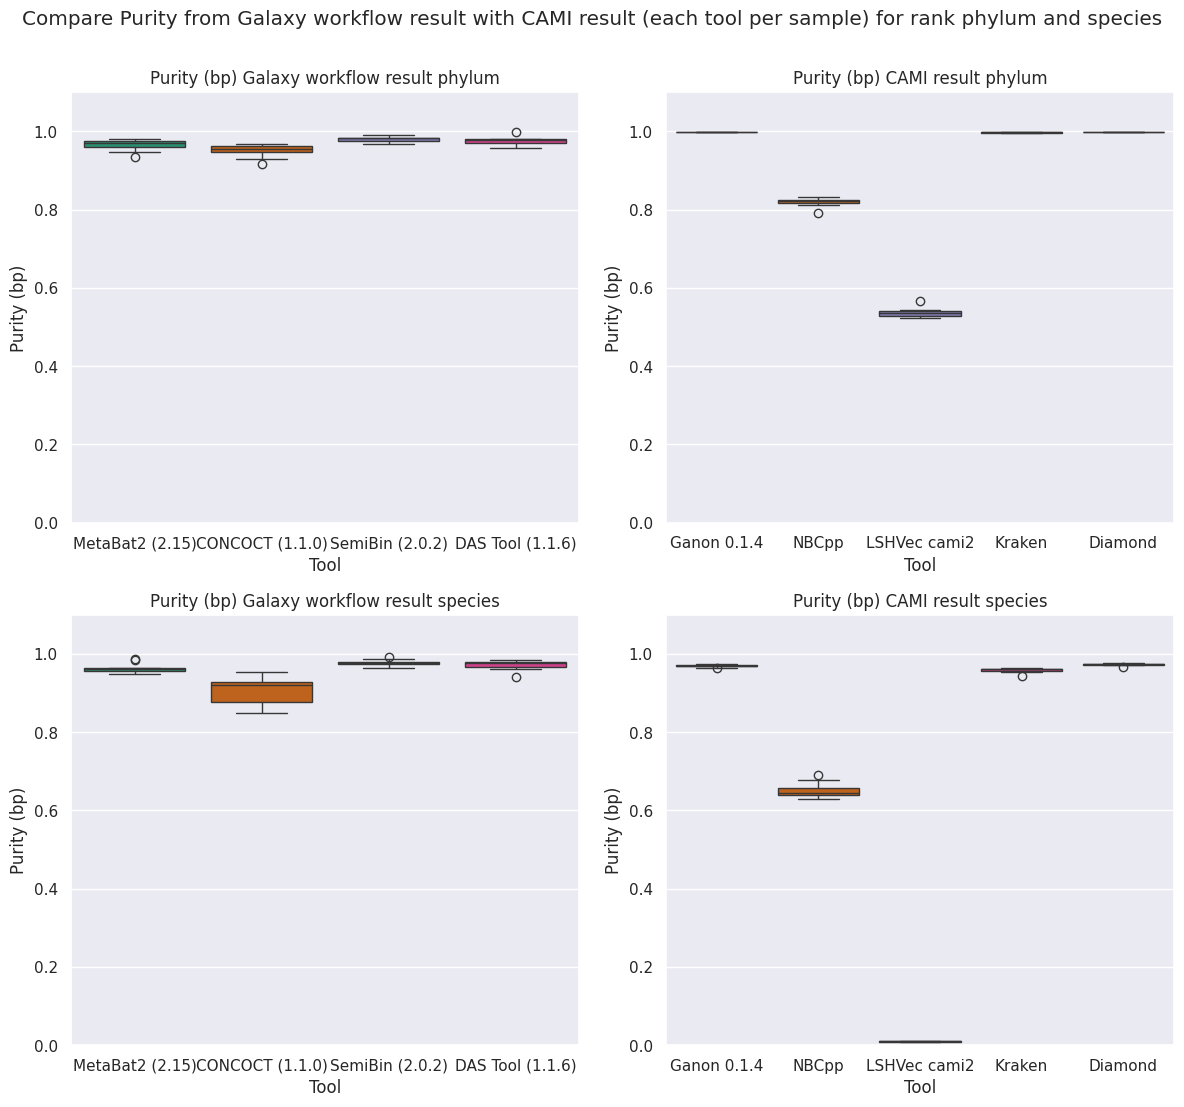

In [98]:
#BOXPLOT FOR PURITY (TAXONOMIC)

purity_tax_df = df_tax_val.loc[:,["Sample", "Tool", "purity_bp", 'rank']]
purity_tax_df.rename(columns={
    'purity_bp': 'Purity (bp)',
}, inplace=True)
purity_tax_df = purity_tax_df[purity_tax_df['Tool'] != 'Gold standard']
purity_tax_df_species = purity_tax_df[purity_tax_df['rank'] == 'species']
purity_tax_df_phylum = purity_tax_df[purity_tax_df['rank'] == 'phylum']
print(purity_tax_df_species.head())
print(purity_tax_df_phylum.head())

# column names do not match need to find matching columns and relabel

sub_df_results = merged_df.loc[:,['Sample', "Tool", "Purity (bp) (unfiltered)", "rank"]]
sub_df_results.rename(columns={
    'Purity (bp) (unfiltered)': 'Purity (bp)',
}, inplace=True)
sub_df_results = sub_df_results[sub_df_results['Tool'] != 'Gold standard']
sub_df_results_species = sub_df_results[sub_df_results['rank'] == 'species']
sub_df_results_phylum = sub_df_results[sub_df_results['rank'] == 'phylum']
print(sub_df_results.head())
print(sub_df_results_species.head())
print(sub_df_results_phylum.head())

fig, axes = plt.subplots(2, 2, figsize=(12, 11))

fig.suptitle('Compare Purity from Galaxy workflow result with CAMI result (each tool per sample) for rank phylum and species', y=1.005)

sns.boxplot(ax=axes[0, 0], x='Tool', y='Purity (bp)', data=purity_tax_df_phylum, palette='Dark2', legend=False, hue='Tool').set(title="Purity (bp) Galaxy workflow result phylum")
sns.boxplot(ax=axes[0, 1], x='Tool', y='Purity (bp)', data=sub_df_results_phylum, palette='Dark2', legend=False, hue='Tool').set(title="Purity (bp) CAMI result phylum")
sns.boxplot(ax=axes[1, 0], x='Tool', y='Purity (bp)', data=purity_tax_df_species, palette='Dark2', legend=False, hue='Tool').set(title="Purity (bp) Galaxy workflow result species")
sns.boxplot(ax=axes[1, 1], x='Tool', y='Purity (bp)', data=sub_df_results_species, palette='Dark2', legend=False, hue='Tool').set(title="Purity (bp) CAMI result species")
axes[0, 0].set_ylim(0, 1.1)
axes[0, 1].set_ylim(0, 1.1)
axes[1, 0].set_ylim(0, 1.1)
axes[1, 1].set_ylim(0, 1.1)
plt.tight_layout()


      Sample              Tool  Completeness (bp)     rank
51  sample_0   MetaBat2 (2.15)              0.115  species
52  sample_0   CONCOCT (1.1.0)              0.134  species
53  sample_0   SemiBin (2.0.2)              0.154  species
54  sample_0  DAS Tool (1.1.6)              0.133  species
56  sample_1   MetaBat2 (2.15)              0.138  species
     Sample              Tool  Completeness (bp)    rank
1  sample_0   MetaBat2 (2.15)              0.174  phylum
2  sample_0   CONCOCT (1.1.0)              0.221  phylum
3  sample_0   SemiBin (2.0.2)              0.258  phylum
4  sample_0  DAS Tool (1.1.6)              0.207  phylum
6  sample_1   MetaBat2 (2.15)              0.183  phylum
                            Sample         Tool  Completeness (bp)  \
7   marmgCAMI2_short_read_sample_0  Ganon 0.1.4           0.942608   
8   marmgCAMI2_short_read_sample_0  Ganon 0.1.4           0.942363   
9   marmgCAMI2_short_read_sample_0  Ganon 0.1.4           0.941583   
10  marmgCAMI2_short_rea

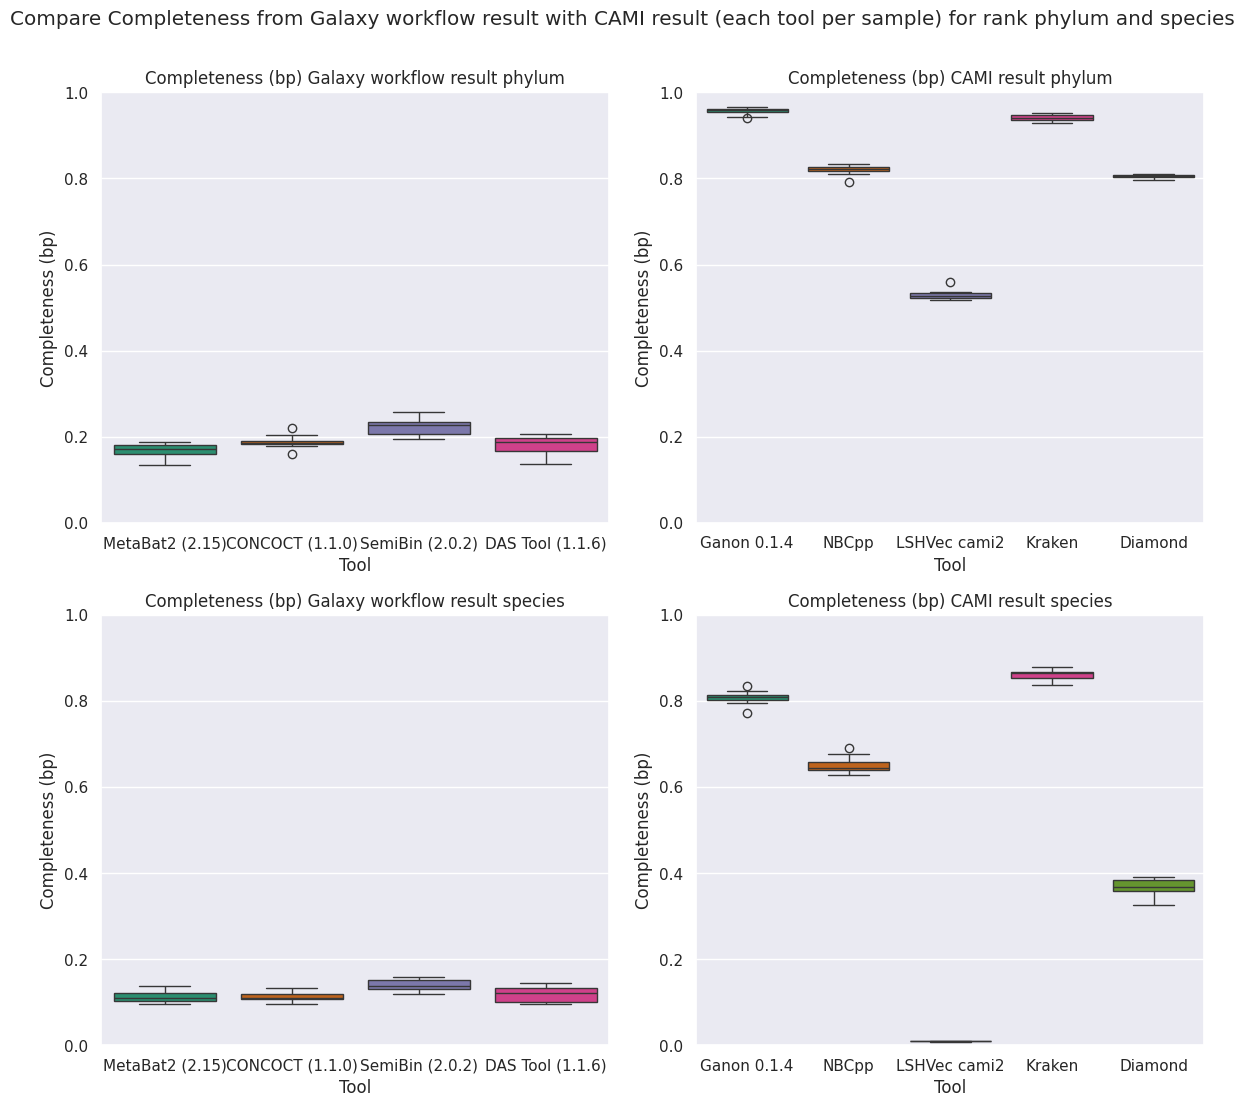

In [99]:
#BOXPLOT FOR COMPLETENESS (TAXONOMIC)

completeness_tax_df = df_tax_val.loc[:,["Sample", "Tool", "completeness_bp", 'rank']]
completeness_tax_df.rename(columns={
    'completeness_bp': 'Completeness (bp)',
}, inplace=True)
completeness_tax_df = completeness_tax_df[completeness_tax_df['Tool'] != 'Gold standard']
completeness_tax_df_species = completeness_tax_df[completeness_tax_df['rank'] == 'species']
completeness_tax_df_phylum = completeness_tax_df[completeness_tax_df['rank'] == 'phylum']
print(completeness_tax_df_species.head())
print(completeness_tax_df_phylum.head())

# column names do not match need to find matching columns and relabel

sub_df_results = merged_df.loc[:,['Sample', "Tool", "Completeness (bp) (unfiltered)", "rank"]]
sub_df_results.rename(columns={
    'Completeness (bp) (unfiltered)': 'Completeness (bp)',
}, inplace=True)
sub_df_results = sub_df_results[sub_df_results['Tool'] != 'Gold standard']
sub_df_results_species = sub_df_results[sub_df_results['rank'] == 'species']
sub_df_results_phylum = sub_df_results[sub_df_results['rank'] == 'phylum']
print(sub_df_results.head())
print(sub_df_results_species.head())
print(sub_df_results_phylum.head())

fig, axes = plt.subplots(2, 2, figsize=(12, 11))

fig.suptitle('Compare Completeness from Galaxy workflow result with CAMI result (each tool per sample) for rank phylum and species', y=1.005)

sns.boxplot(ax=axes[0, 0], x='Tool', y='Completeness (bp)', data=completeness_tax_df_phylum, palette='Dark2', legend=False, hue='Tool').set(title="Completeness (bp) Galaxy workflow result phylum")
sns.boxplot(ax=axes[0, 1], x='Tool', y='Completeness (bp)', data=sub_df_results_phylum, palette='Dark2', legend=False, hue='Tool').set(title="Completeness (bp) CAMI result phylum")
sns.boxplot(ax=axes[1, 0], x='Tool', y='Completeness (bp)', data=completeness_tax_df_species, palette='Dark2', legend=False, hue='Tool').set(title="Completeness (bp) Galaxy workflow result species")
sns.boxplot(ax=axes[1, 1], x='Tool', y='Completeness (bp)', data=sub_df_results_species, palette='Dark2', legend=False, hue='Tool').set(title="Completeness (bp) CAMI result species")
axes[0, 0].set_ylim(0, 1)
axes[0, 1].set_ylim(0, 1)
axes[1, 0].set_ylim(0, 1)
axes[1, 1].set_ylim(0, 1)
plt.tight_layout()

      Sample              Tool  Percentage of bp binned (bp)     rank
51  sample_0   MetaBat2 (2.15)                         0.120  species
52  sample_0   CONCOCT (1.1.0)                         0.146  species
53  sample_0   SemiBin (2.0.2)                         0.157  species
54  sample_0  DAS Tool (1.1.6)                         0.135  species
56  sample_1   MetaBat2 (2.15)                         0.146  species
     Sample              Tool  Percentage of bp binned (bp)    rank
1  sample_0   MetaBat2 (2.15)                         0.177  phylum
2  sample_0   CONCOCT (1.1.0)                         0.228  phylum
3  sample_0   SemiBin (2.0.2)                         0.260  phylum
4  sample_0  DAS Tool (1.1.6)                         0.208  phylum
6  sample_1   MetaBat2 (2.15)                         0.193  phylum
                            Sample         Tool  Percentage of bp binned (bp)  \
7   marmgCAMI2_short_read_sample_0  Ganon 0.1.4                      0.942635   
8   marmgC

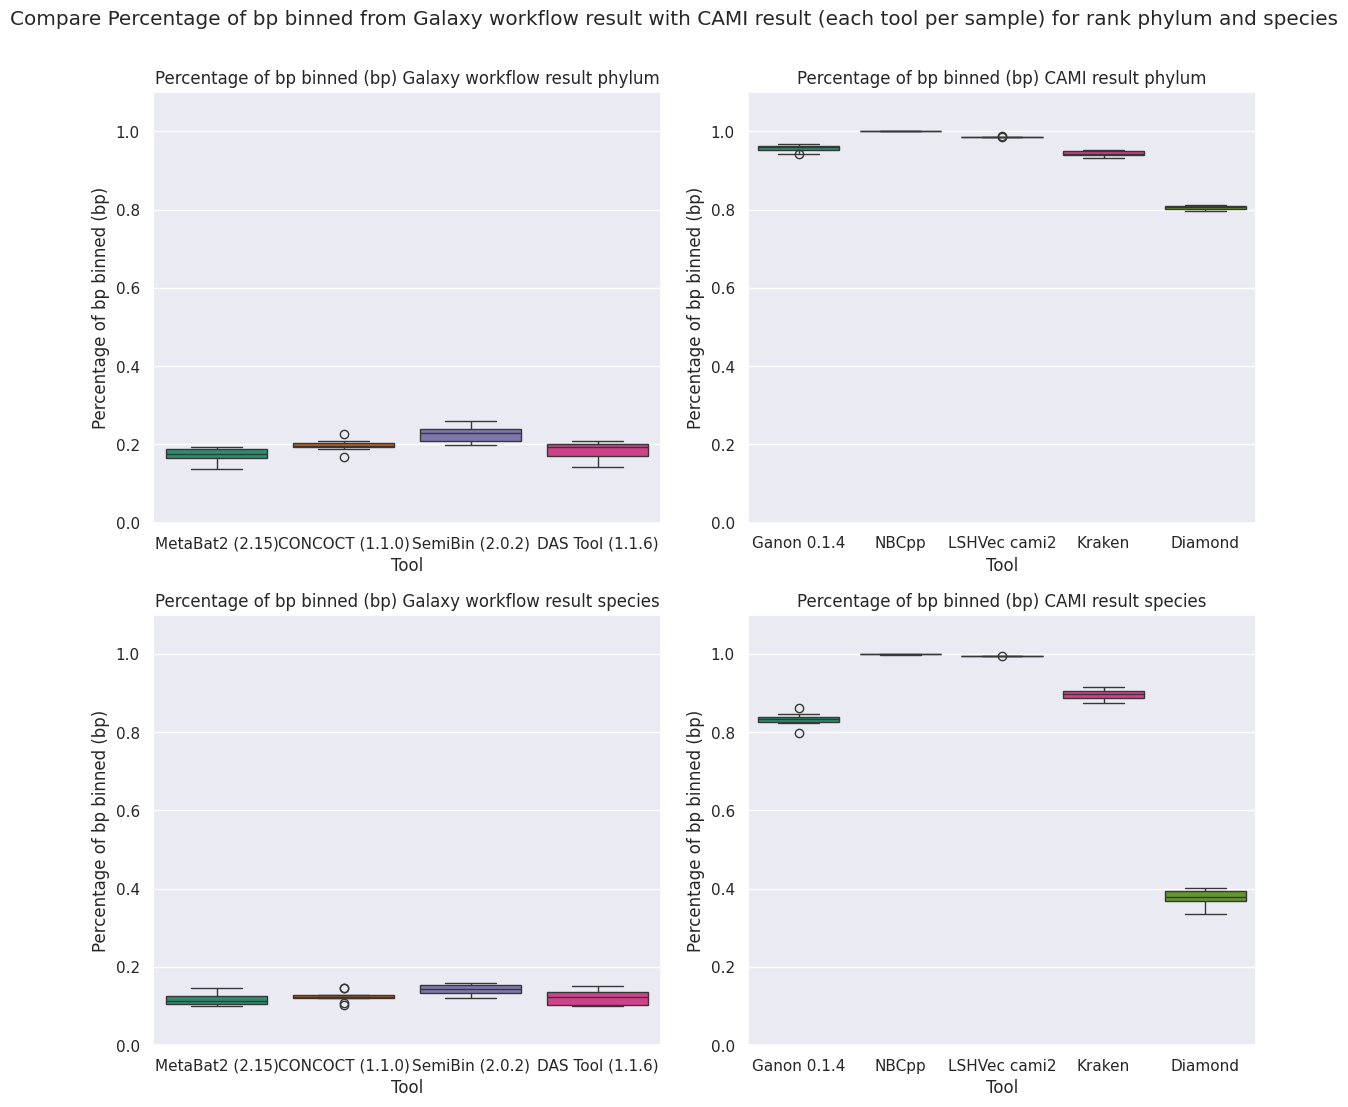

In [100]:
#BOXPLOT FOR PERCENTAGE BINNED (TAXONOMIC)

percentage_tax_df = df_tax_val.loc[:,["Sample", "Tool", "percentage_binned_pb", 'rank']]
percentage_tax_df.rename(columns={
    'percentage_binned_pb': 'Percentage of bp binned (bp)',
}, inplace=True)

percentage_tax_df = percentage_tax_df[percentage_tax_df['Tool'] != 'Gold standard']
percentage_tax_df_species = percentage_tax_df[percentage_tax_df['rank'] == 'species']
percentage_tax_df_phylum = percentage_tax_df[percentage_tax_df['rank'] == 'phylum']
print(percentage_tax_df_species.head())
print(percentage_tax_df_phylum.head())

# column names do not match need to find matching columns and relabel

sub_df_results = merged_df.loc[:,['Sample', "Tool", "Percentage of binned bp (unfiltered)", "rank"]]
sub_df_results = sub_df_results[sub_df_results['Tool'] != 'Gold standard']
sub_df_results.rename(columns={
    'Percentage of binned bp (unfiltered)': 'Percentage of bp binned (bp)',
}, inplace=True)

sub_df_results_species = sub_df_results[sub_df_results['rank'] == 'species']
sub_df_results_phylum = sub_df_results[sub_df_results['rank'] == 'phylum']
print(sub_df_results.head())
print(sub_df_results_species.head())
print(sub_df_results_phylum.head())

fig, axes = plt.subplots(2, 2, figsize=(12, 11))

fig.suptitle('Compare Percentage of bp binned from Galaxy workflow result with CAMI result (each tool per sample) for rank phylum and species', y=1.005)

sns.boxplot(ax=axes[0, 0], x='Tool', y='Percentage of bp binned (bp)', data=percentage_tax_df_phylum, palette='Dark2', legend=False, hue='Tool').set(title="Percentage of bp binned (bp) Galaxy workflow result phylum")
sns.boxplot(ax=axes[0, 1], x='Tool', y='Percentage of bp binned (bp)', data=sub_df_results_phylum, palette='Dark2', legend=False, hue='Tool').set(title="Percentage of bp binned (bp) CAMI result phylum")
sns.boxplot(ax=axes[1, 0], x='Tool', y='Percentage of bp binned (bp)', data=percentage_tax_df_species, palette='Dark2', legend=False, hue='Tool').set(title="Percentage of bp binned (bp) Galaxy workflow result species")
sns.boxplot(ax=axes[1, 1], x='Tool', y='Percentage of bp binned (bp)', data=sub_df_results_species, palette='Dark2', legend=False, hue='Tool').set(title="Percentage of bp binned (bp) CAMI result species")
axes[0, 0].set_ylim(0, 1.1)
axes[0, 1].set_ylim(0, 1.1)
axes[1, 0].set_ylim(0, 1.1)
axes[1, 1].set_ylim(0, 1.1)
plt.tight_layout()

      Sample              Tool  ARI (bp)     rank binning type
63  sample_0   MetaBat2 (2.15)  0.979873  species    taxonomic
70  sample_0   CONCOCT (1.1.0)  0.932703  species    taxonomic
77  sample_0   SemiBin (2.0.2)  0.985254  species    taxonomic
84  sample_0  DAS Tool (1.1.6)  0.984261  species    taxonomic
99  sample_1   MetaBat2 (2.15)  0.910945  species    taxonomic
      Sample              Tool  ARI (bp)    rank binning type
58  sample_0   MetaBat2 (2.15)  0.989074  phylum    taxonomic
65  sample_0   CONCOCT (1.1.0)  0.984497  phylum    taxonomic
72  sample_0   SemiBin (2.0.2)  0.996450  phylum    taxonomic
79  sample_0  DAS Tool (1.1.6)  0.996947  phylum    taxonomic
94  sample_1   MetaBat2 (2.15)  0.984382  phylum    taxonomic
                            Sample         Tool  ARI (bp)          rank
7   marmgCAMI2_short_read_sample_0  Ganon 0.1.4  1.000006  superkingdom
8   marmgCAMI2_short_read_sample_0  Ganon 0.1.4  1.000156        phylum
9   marmgCAMI2_short_read_sample_0

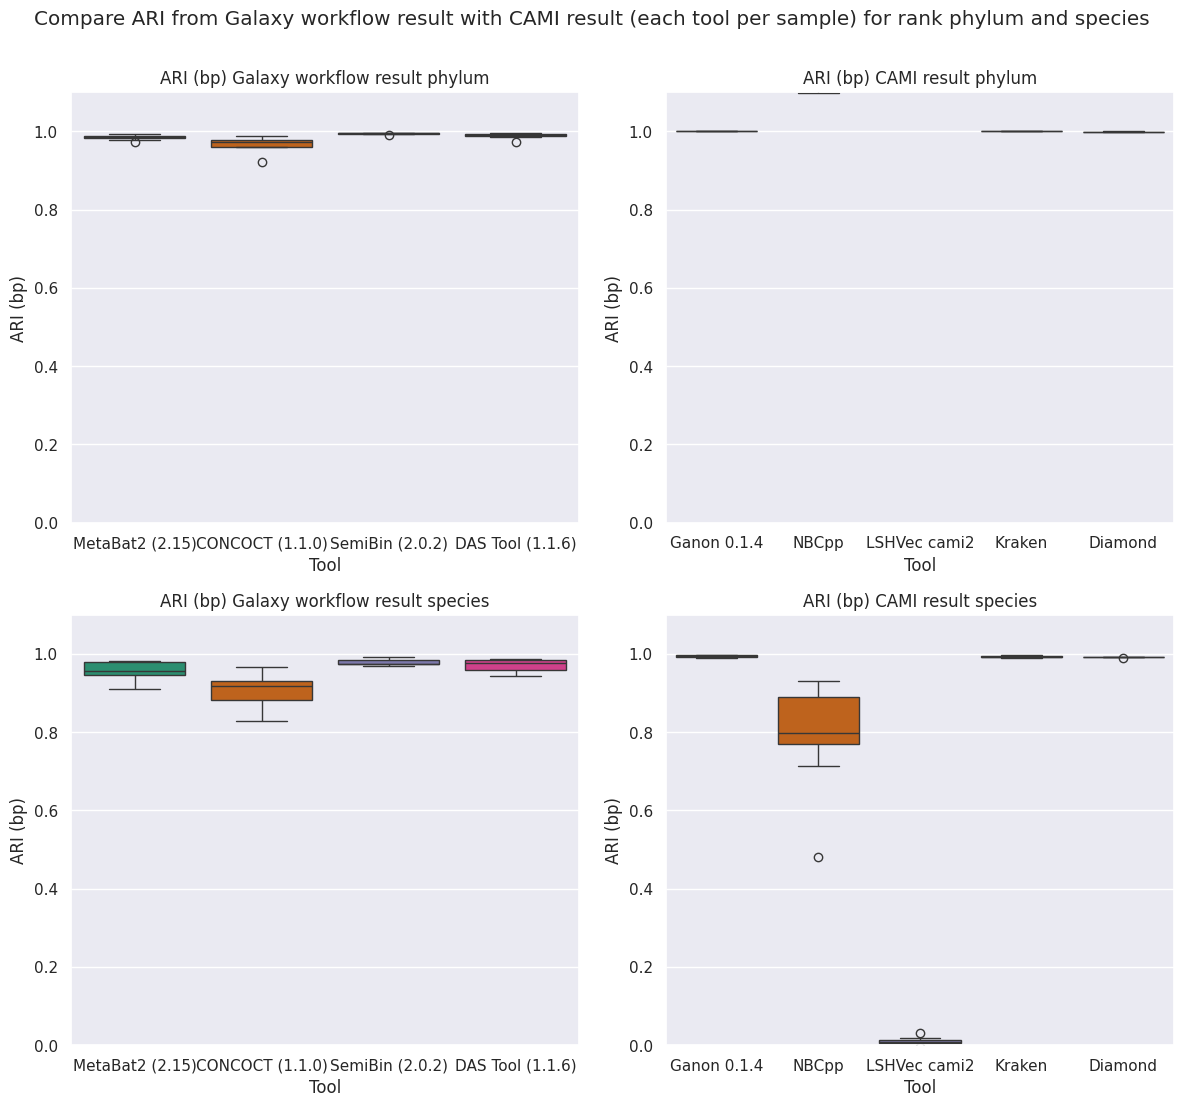

In [101]:
#BOXPLOT FOR ARI (TAXONOMIC)

ari_tax_df = df_result.loc[:,["Sample", "Tool", "adjusted_rand_index_bp", 'rank', 'binning type']]
ari_tax_df.rename(columns={
    'adjusted_rand_index_bp': 'ARI (bp)',
}, inplace=True)

ari_tax_df = ari_tax_df[ari_tax_df['Tool'] != 'Gold standard']
ari_tax_df = ari_tax_df[ari_tax_df['binning type'] == 'taxonomic']
ari_tax_df_species = ari_tax_df[ari_tax_df['rank'] == 'species']
ari_tax_df_phylum = ari_tax_df[ari_tax_df['rank'] == 'phylum']
print(ari_tax_df_species.head())
print(ari_tax_df_phylum.head())

# column names do not match need to find matching columns and relabel

sub_df_results = merged_df.loc[:,['Sample', "Tool", "Adjusted Rand index (bp) (unfiltered)", "rank"]]
sub_df_results = sub_df_results[sub_df_results['Tool'] != 'Gold standard']
sub_df_results.rename(columns={
    'Adjusted Rand index (bp) (unfiltered)': 'ARI (bp)',
}, inplace=True)

sub_df_results_species = sub_df_results[sub_df_results['rank'] == 'species']
sub_df_results_phylum = sub_df_results[sub_df_results['rank'] == 'phylum']
print(sub_df_results.head())
print(sub_df_results_species.head())
print(sub_df_results_phylum.head())

fig, axes = plt.subplots(2, 2, figsize=(12, 11))

fig.suptitle('Compare ARI from Galaxy workflow result with CAMI result (each tool per sample) for rank phylum and species', y=1.005)

sns.boxplot(ax=axes[0, 0], x='Tool', y='ARI (bp)', data=ari_tax_df_phylum, palette='Dark2', legend=False, hue='Tool').set(title="ARI (bp) Galaxy workflow result phylum")
sns.boxplot(ax=axes[0, 1], x='Tool', y='ARI (bp)', data=sub_df_results_phylum, palette='Dark2', legend=False, hue='Tool').set(title="ARI (bp) CAMI result phylum")
sns.boxplot(ax=axes[1, 0], x='Tool', y='ARI (bp)', data=ari_tax_df_species, palette='Dark2', legend=False, hue='Tool').set(title="ARI (bp) Galaxy workflow result species")
sns.boxplot(ax=axes[1, 1], x='Tool', y='ARI (bp)', data=sub_df_results_species, palette='Dark2', legend=False, hue='Tool').set(title="ARI (bp) CAMI result species")
axes[0, 0].set_ylim(0, 1.1)
axes[0, 1].set_ylim(0, 1.1)
axes[1, 0].set_ylim(0, 1.1)
axes[1, 1].set_ylim(0, 1.1)
plt.tight_layout()

      Sample              Tool   RI (bp)     rank binning type
63  sample_0   MetaBat2 (2.15)  0.998501  species    taxonomic
70  sample_0   CONCOCT (1.1.0)  0.995660  species    taxonomic
77  sample_0   SemiBin (2.0.2)  0.999143  species    taxonomic
84  sample_0  DAS Tool (1.1.6)  0.998917  species    taxonomic
99  sample_1   MetaBat2 (2.15)  0.994676  species    taxonomic
      Sample              Tool   RI (bp)    rank binning type
58  sample_0   MetaBat2 (2.15)  0.995349  phylum    taxonomic
65  sample_0   CONCOCT (1.1.0)  0.994147  phylum    taxonomic
72  sample_0   SemiBin (2.0.2)  0.998267  phylum    taxonomic
79  sample_0  DAS Tool (1.1.6)  0.998589  phylum    taxonomic
94  sample_1   MetaBat2 (2.15)  0.994126  phylum    taxonomic
                            Sample         Tool   RI (bp)          rank
7   marmgCAMI2_short_read_sample_0  Ganon 0.1.4  0.999587  superkingdom
8   marmgCAMI2_short_read_sample_0  Ganon 0.1.4  0.994969        phylum
9   marmgCAMI2_short_read_sample_0

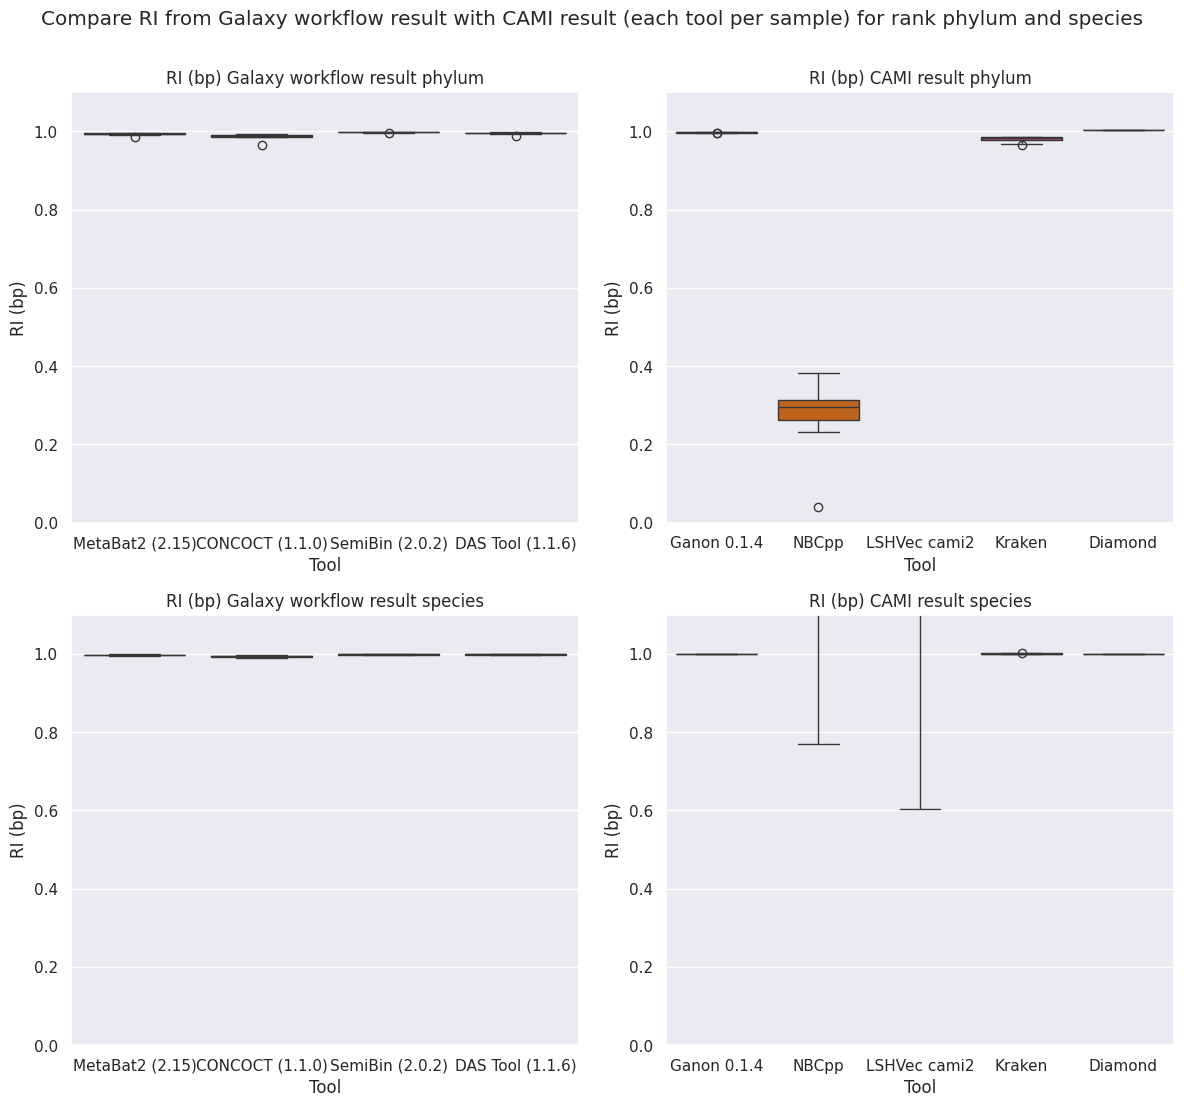

In [102]:
#BOXPLOT FOR RI (TAXONOMIC)

ri_tax_df = df_result.loc[:,["Sample", "Tool", "rand_index_bp", 'rank', 'binning type']]
ri_tax_df.rename(columns={
    'rand_index_bp': 'RI (bp)',
}, inplace=True)

ri_tax_df = ri_tax_df[ri_tax_df['Tool'] != 'Gold standard']
ri_tax_df = ri_tax_df[ri_tax_df['binning type'] == 'taxonomic']
ri_tax_df_species = ri_tax_df[ri_tax_df['rank'] == 'species']
ri_tax_df_phylum = ri_tax_df[ri_tax_df['rank'] == 'phylum']
print(ri_tax_df_species.head())
print(ri_tax_df_phylum.head())

# column names do not match need to find matching columns and relabel

sub_df_results = merged_df.loc[:,['Sample', "Tool", "Rand index (bp) (unfiltered)", "rank"]]
sub_df_results = sub_df_results[sub_df_results['Tool'] != 'Gold standard']
sub_df_results.rename(columns={
    'Rand index (bp) (unfiltered)': 'RI (bp)',
}, inplace=True)

sub_df_results_species = sub_df_results[sub_df_results['rank'] == 'species']
sub_df_results_phylum = sub_df_results[sub_df_results['rank'] == 'phylum']
print(sub_df_results.head())
print(sub_df_results_species.head())
print(sub_df_results_phylum.head())

fig, axes = plt.subplots(2, 2, figsize=(12, 11))

fig.suptitle('Compare RI from Galaxy workflow result with CAMI result (each tool per sample) for rank phylum and species', y=1.005)

sns.boxplot(ax=axes[0, 0], x='Tool', y='RI (bp)', data=ri_tax_df_phylum, palette='Dark2', legend=False, hue='Tool').set(title="RI (bp) Galaxy workflow result phylum")
sns.boxplot(ax=axes[0, 1], x='Tool', y='RI (bp)', data=sub_df_results_phylum, palette='Dark2', legend=False, hue='Tool').set(title="RI (bp) CAMI result phylum")
sns.boxplot(ax=axes[1, 0], x='Tool', y='RI (bp)', data=ri_tax_df_species, palette='Dark2', legend=False, hue='Tool').set(title="RI (bp) Galaxy workflow result species")
sns.boxplot(ax=axes[1, 1], x='Tool', y='RI (bp)', data=sub_df_results_species, palette='Dark2', legend=False, hue='Tool').set(title="RI (bp) CAMI result species")
axes[0, 0].set_ylim(0, 1.1)
axes[0, 1].set_ylim(0, 1.1)
axes[1, 0].set_ylim(0, 1.1)
axes[1, 1].set_ylim(0, 1.1)
plt.tight_layout()

      Sample              Tool  UniFrac (bp)     rank
63  sample_0   MetaBat2 (2.15)      5.568741  species
70  sample_0   CONCOCT (1.1.0)      4.887854  species
77  sample_0   SemiBin (2.0.2)      3.603987  species
84  sample_0  DAS Tool (1.1.6)      4.727762  species
99  sample_1   MetaBat2 (2.15)      5.681796  species
      Sample              Tool  UniFrac (bp)    rank
58  sample_0   MetaBat2 (2.15)      5.568741  phylum
65  sample_0   CONCOCT (1.1.0)      4.887854  phylum
72  sample_0   SemiBin (2.0.2)      3.603987  phylum
79  sample_0  DAS Tool (1.1.6)      4.727762  phylum
94  sample_1   MetaBat2 (2.15)      5.681796  phylum
                            Sample         Tool  UniFrac (bp)          rank
7   marmgCAMI2_short_read_sample_0  Ganon 0.1.4      0.464297  superkingdom
8   marmgCAMI2_short_read_sample_0  Ganon 0.1.4      0.464297        phylum
9   marmgCAMI2_short_read_sample_0  Ganon 0.1.4      0.464297         class
10  marmgCAMI2_short_read_sample_0  Ganon 0.1.4      0

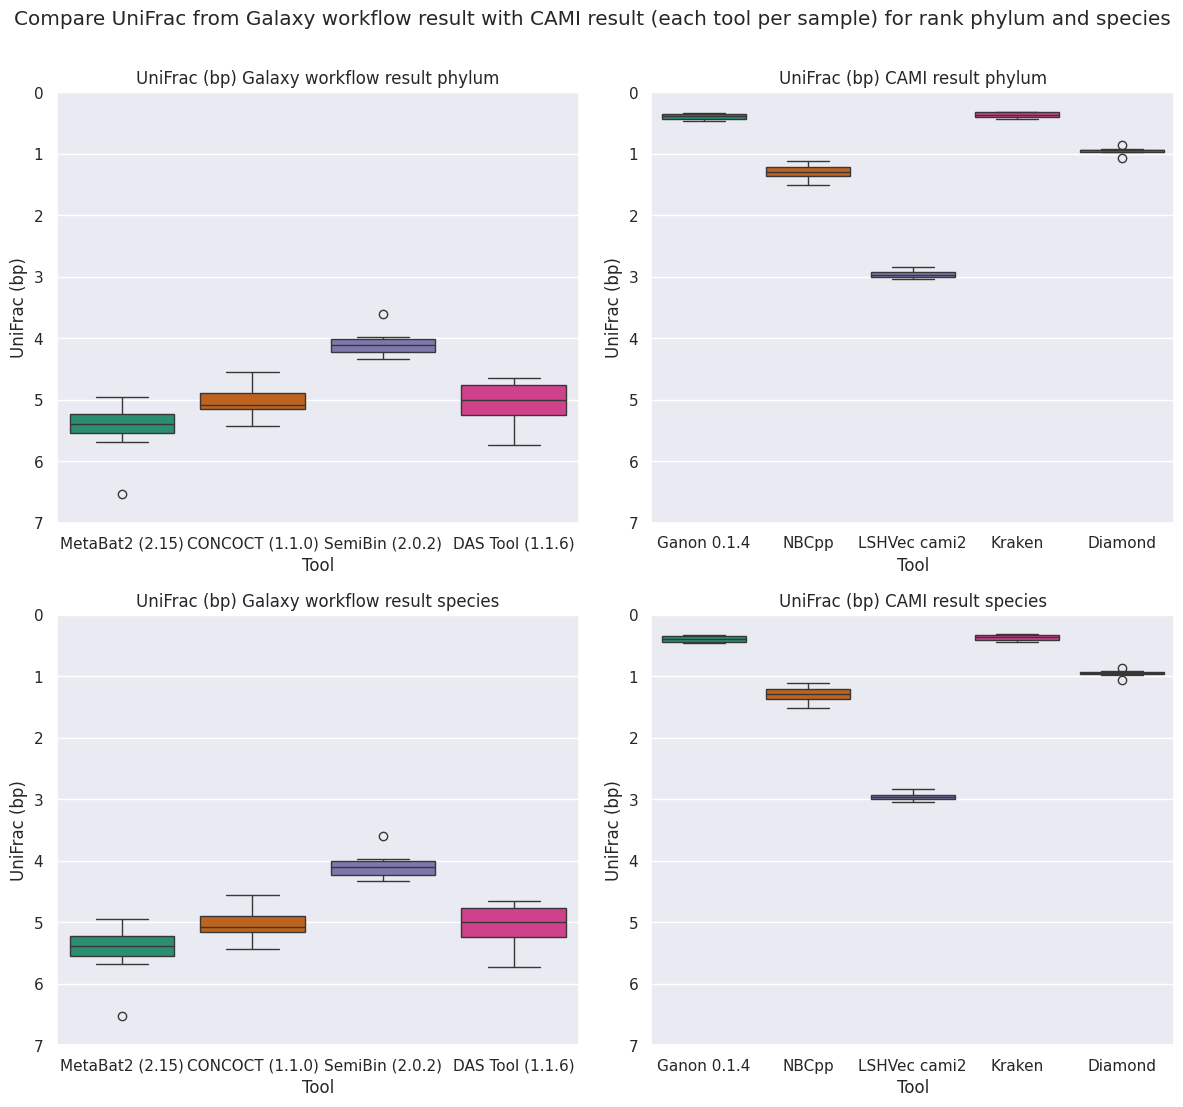

In [103]:
#BOXPLOT FOR UNIFRAC (TAXONOMIC)

uf_tax_df = df_result.loc[:,["Sample", "Tool", "unifrac_bp", 'rank']]
uf_tax_df.rename(columns={
    'unifrac_bp': 'UniFrac (bp)',
}, inplace=True)

uf_tax_df = uf_tax_df[uf_tax_df['Tool'] != 'Gold standard']
uf_tax_df_species = uf_tax_df[uf_tax_df['rank'] == 'species']
uf_tax_df_phylum = uf_tax_df[uf_tax_df['rank'] == 'phylum']
print(uf_tax_df_species.head())
print(uf_tax_df_phylum.head())

# column names do not match need to find matching columns and relabel

sub_df_results = merged_df.loc[:,['Sample', "Tool", "UniFrac (bp) (unfiltered)", "rank"]]
sub_df_results.rename(columns={
    'UniFrac (bp) (unfiltered)': 'UniFrac (bp)',
}, inplace=True)
sub_df_results = sub_df_results[sub_df_results['Tool'] != 'Gold standard']

sub_df_results_species = sub_df_results[sub_df_results['rank'] == 'species']
sub_df_results_phylum = sub_df_results[sub_df_results['rank'] == 'phylum']
print(sub_df_results.head())
print(sub_df_results_species.head())
print(sub_df_results_phylum.head())

fig, axes = plt.subplots(2, 2, figsize=(12, 11))

fig.suptitle('Compare UniFrac from Galaxy workflow result with CAMI result (each tool per sample) for rank phylum and species', y=1.005)

sns.boxplot(ax=axes[0, 0], x='Tool', y='UniFrac (bp)', data=uf_tax_df_phylum, palette='Dark2',legend=False, hue='Tool').set(title="UniFrac (bp) Galaxy workflow result phylum")
sns.boxplot(ax=axes[0, 1], x='Tool', y='UniFrac (bp)', data=sub_df_results_phylum, palette='Dark2',legend=False, hue='Tool').set(title="UniFrac (bp) CAMI result phylum")
sns.boxplot(ax=axes[1, 0], x='Tool', y='UniFrac (bp)', data=uf_tax_df_species, palette='Dark2',legend=False, hue='Tool').set(title="UniFrac (bp) Galaxy workflow result species")
sns.boxplot(ax=axes[1, 1], x='Tool', y='UniFrac (bp)', data=sub_df_results_species, palette='Dark2',legend=False, hue='Tool').set(title="UniFrac (bp) CAMI result species")
axes[0, 0].set_ylim(7, 0)
axes[0, 1].set_ylim(7, 0)
axes[1, 0].set_ylim(7, 0)
axes[1, 1].set_ylim(7, 0)
plt.tight_layout()